# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l2/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l2_active/680988889_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1474957626_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/487792155_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1909398279_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/426019904_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/680988889_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success)

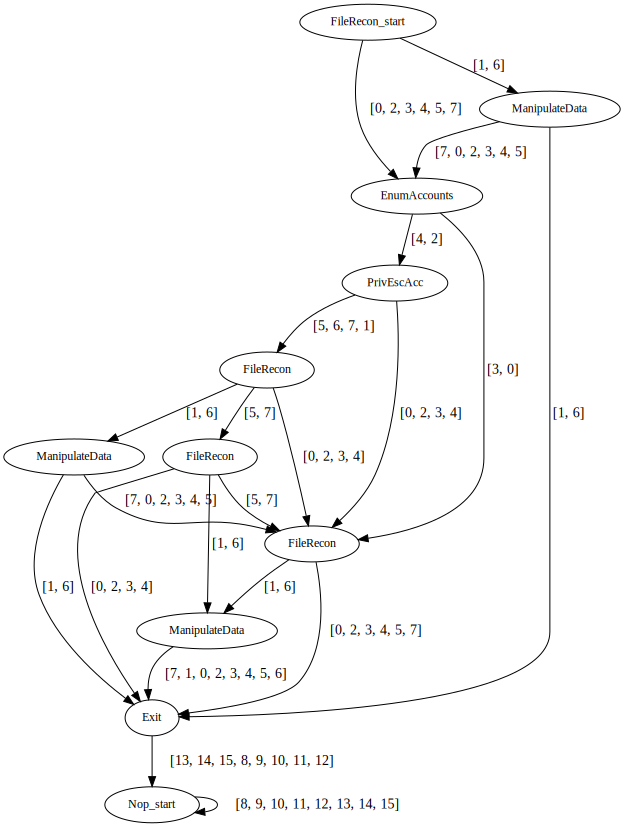

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1474957626_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success

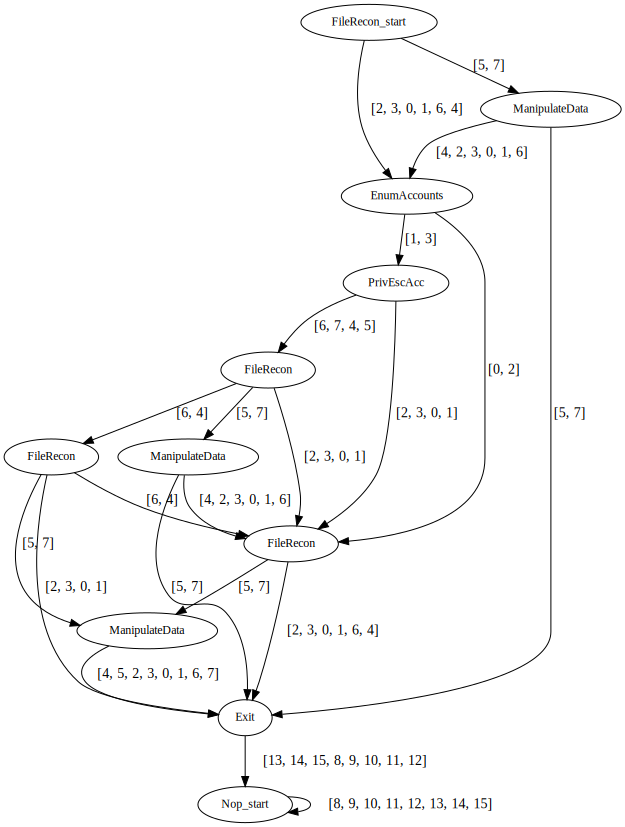

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/487792155_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


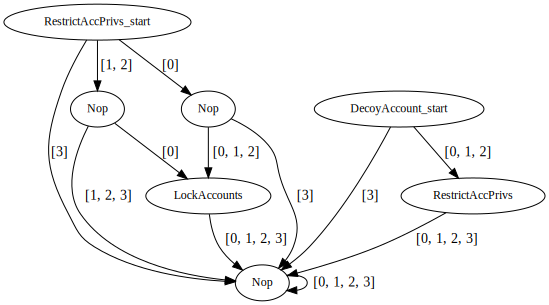

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1909398279_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


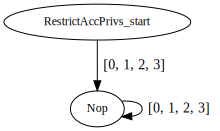

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/426019904_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active), (DefenseObs, acc_policy_change)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active), (DefenseObs, perms_change)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active), (DefenseObs, none)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure

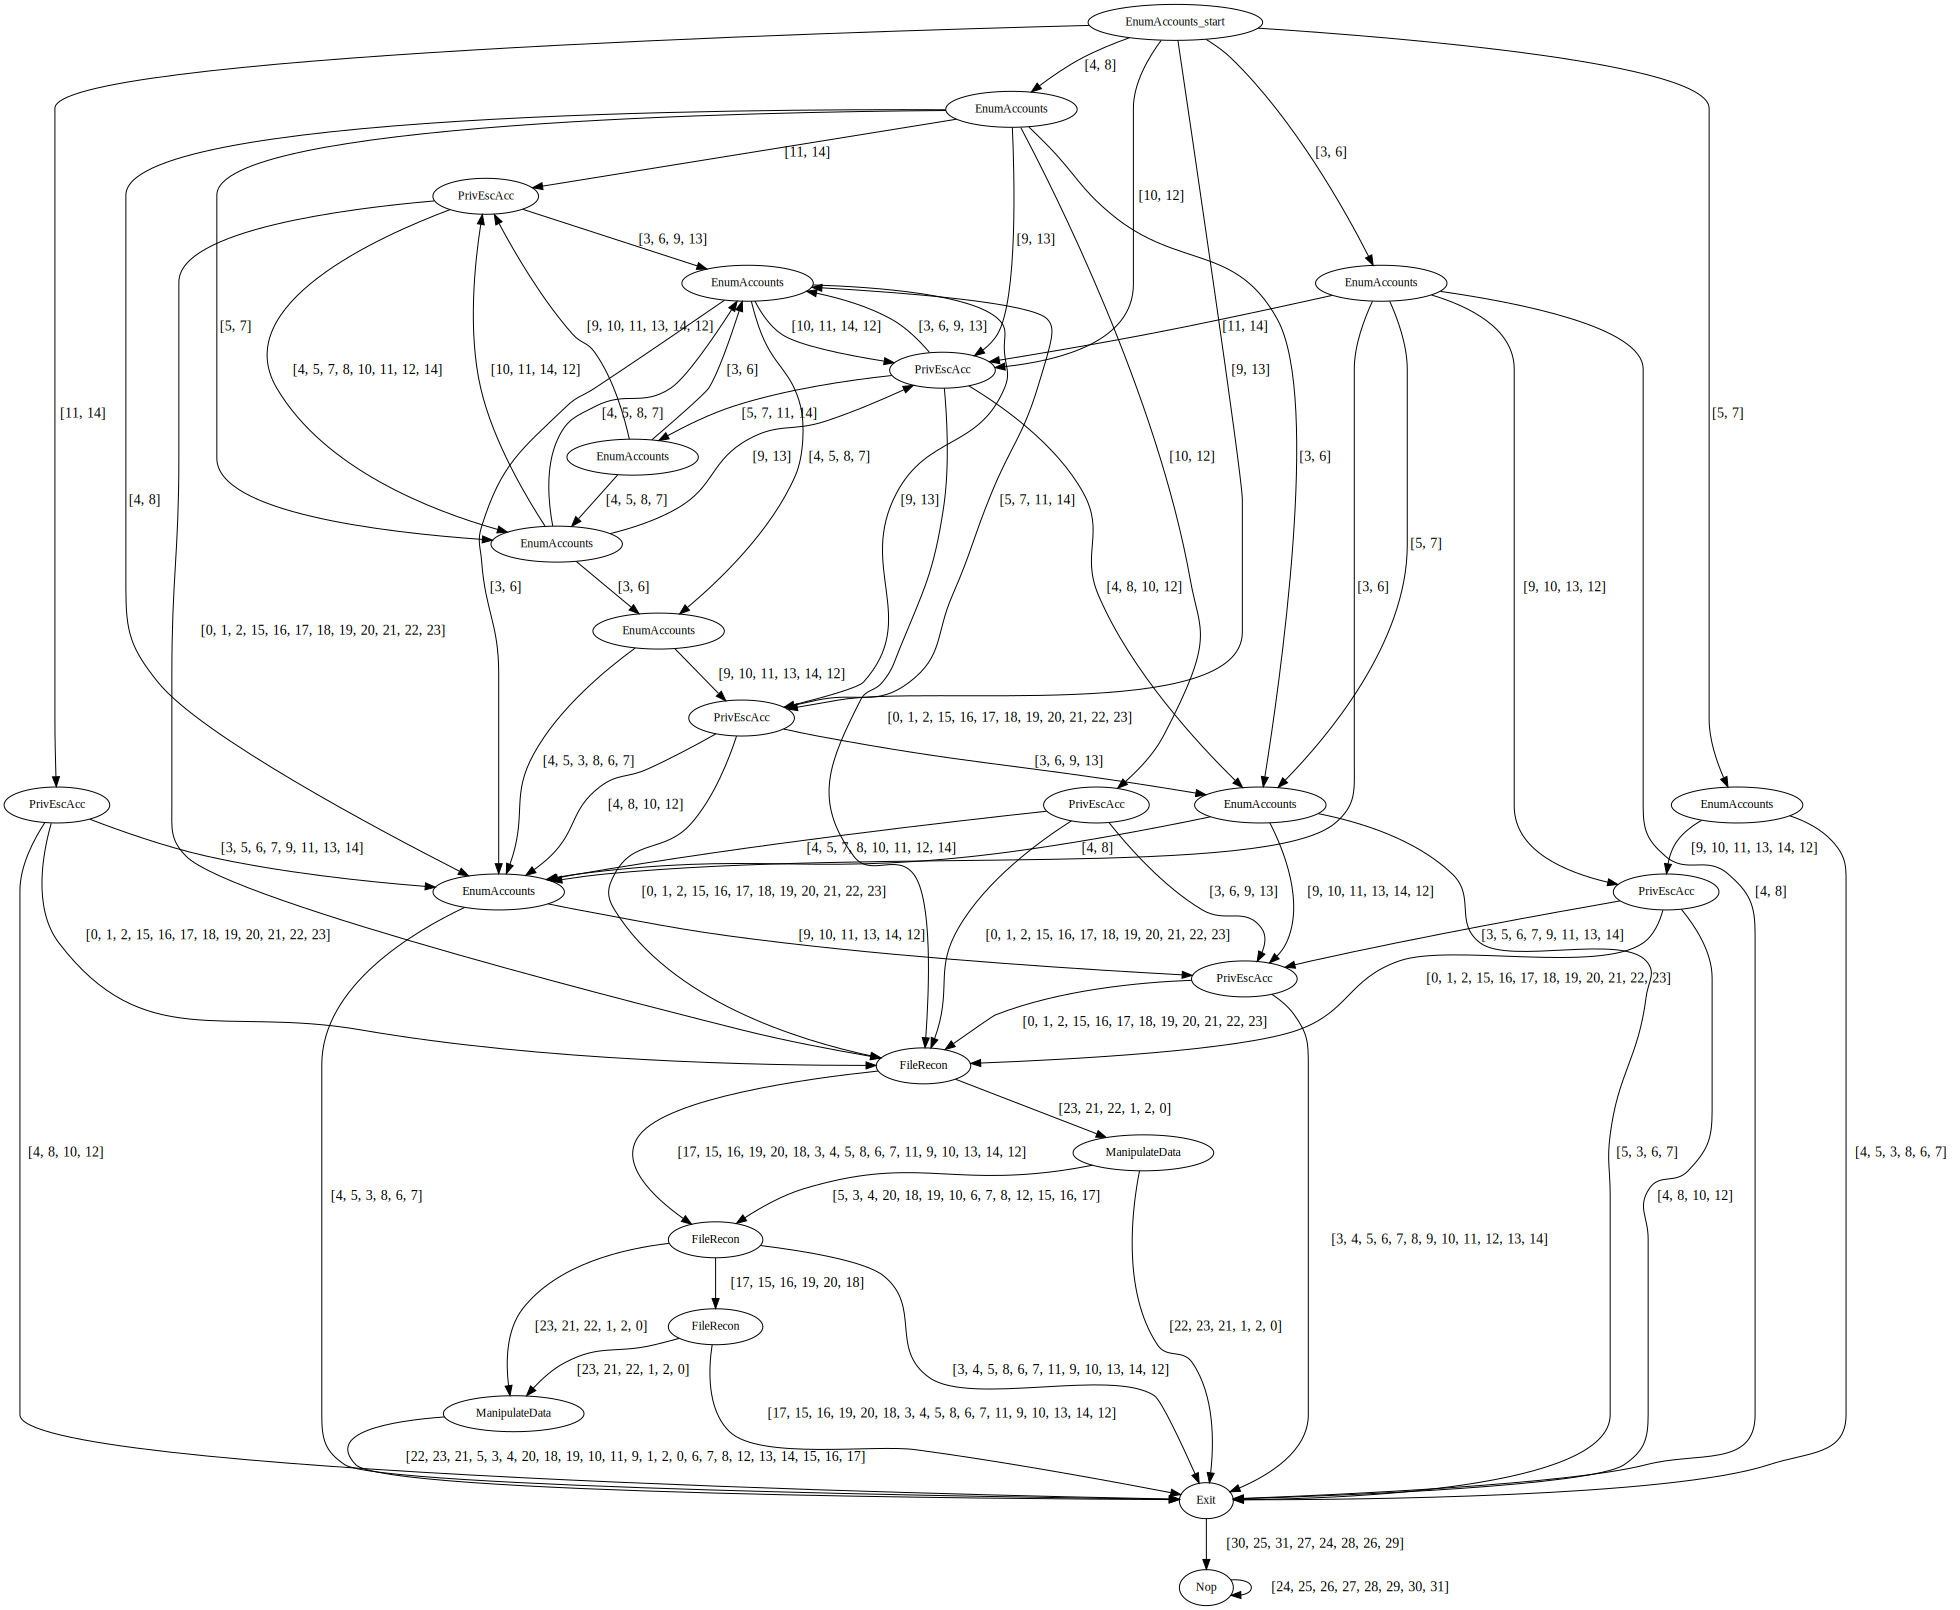

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.997698                        0.002302   
3                         0.998385                        0.001615   
4                         0.998385                        0.001615   
5                         0.998385                        0.001615   
6                         0.998385                        0.001615   
7                         0.998386                        0.001615   
8                         0.998385                        0.001615   
9                         0.998386                        0.001615   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                            auth                         none   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

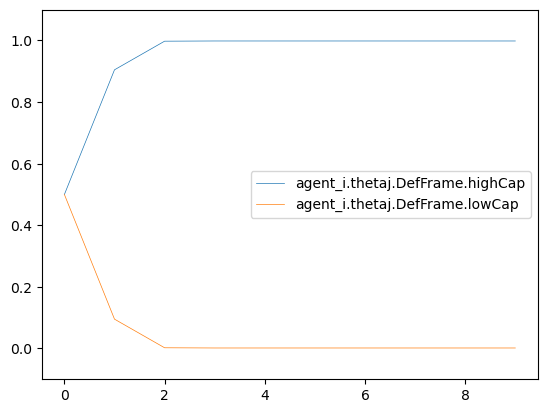

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

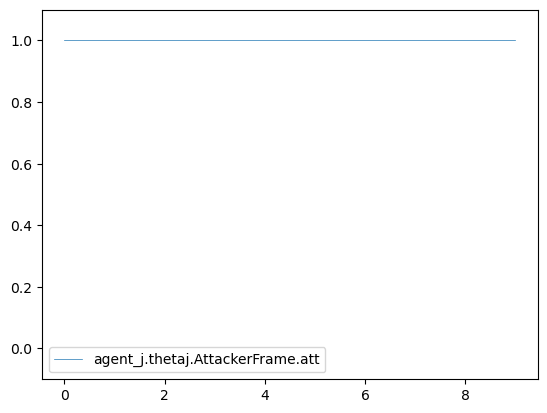

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0   EnumAccounts      DecoyAccount
1                0.0                 1.0   EnumAccounts  RestrictAccPrivs
2                0.0                 1.0     PrivEscAcc               Nop
3                0.0                 1.0      FileRecon               Nop
4                0.0                 1.0      FileRecon               Nop
5                0.0                 1.0      FileRecon               Nop
6                0.0                 1.0           Exit               Nop
7                0.0                 1.0            Nop               Nop
8                0.0                 1.0            Nop               Nop
9                0.0                 1.0            Nop               Nop

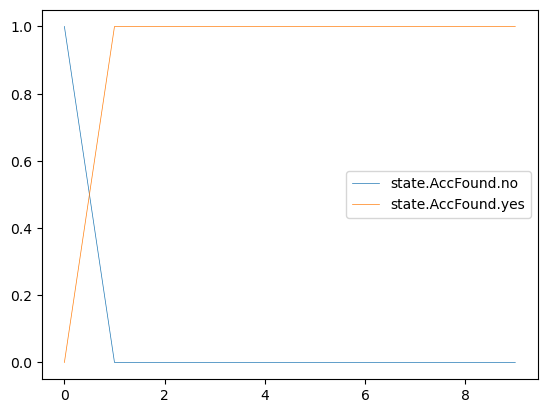

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000   EnumAccounts      DecoyAccount   
1             0.931034              0.068966   EnumAccounts  RestrictAccPrivs   
2             0.025803              0.974198     PrivEscAcc               Nop   
3             0.000000              1.000000      FileRecon               Nop   
4             0.000000              1.000000      FileRecon               Nop   
5             0.000000              1.000000      FileRecon               Nop   
6             0.000000              1.000000           Exit               Nop   
7             0.000000              1.000000            Nop               Nop   
8             0.000000              1.000000            Nop               Nop   
9             0.000000              1.000000            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                            auth                         none   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

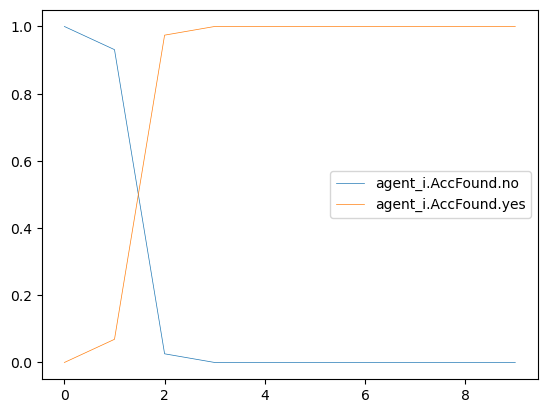

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000      DecoyAccount   EnumAccounts   
1             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
2             0.504030              0.495970               Nop     PrivEscAcc   
3             0.103091              0.896909               Nop      FileRecon   
4             0.086298              0.913702               Nop      FileRecon   
5             0.037662              0.962338               Nop      FileRecon   
6             0.007281              0.992719               Nop           Exit   
7             0.007378              0.992622               Nop            Nop   
8             0.007379              0.992621               Nop            Nop   
9             0.007379              0.992620               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

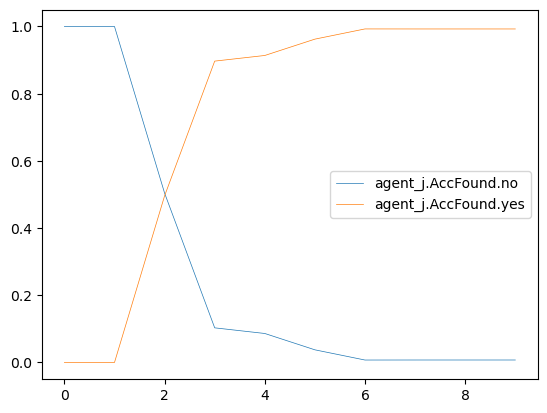

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0   EnumAccounts   
1                    1.0                     0.0   EnumAccounts   
2                    1.0                     0.0     PrivEscAcc   
3                    1.0                     0.0      FileRecon   
4                    1.0                     0.0      FileRecon   
5                    1.0                     0.0      FileRecon   
6                    1.0                     0.0           Exit   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

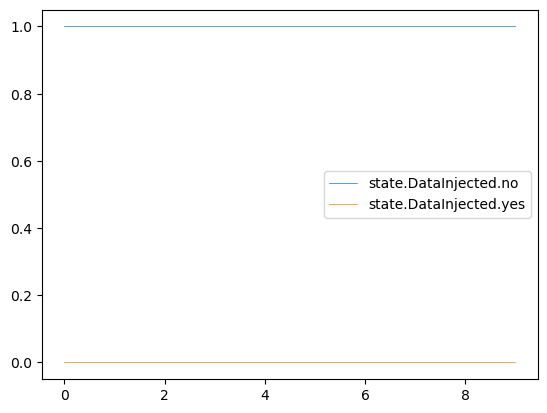

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

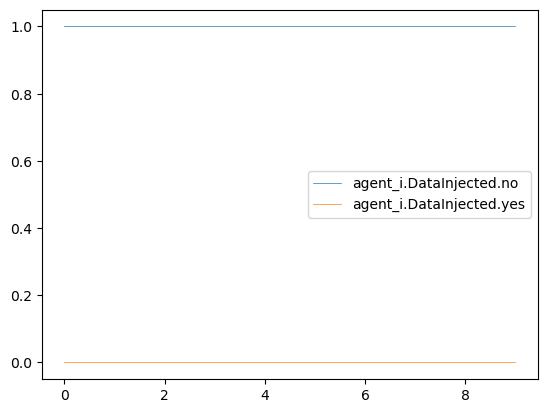

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.763824                  0.236176               Nop   
3                 0.937064                  0.062936               Nop   
4                 0.733213                  0.266787               Nop   
5                 0.325734                  0.674266               Nop   
6                 0.019298                  0.980702               Nop   
7                 0.014666                  0.985334               Nop   
8                 0.014655                  0.985345               Nop   
9                 0.014655                  0.985345               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

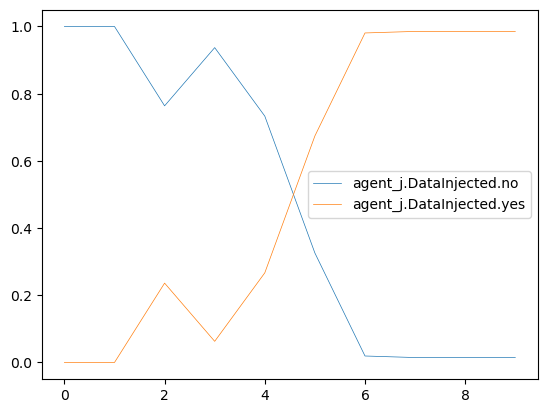

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0   EnumAccounts      DecoyAccount
1                 0.0                  1.0   EnumAccounts  RestrictAccPrivs
2                 0.0                  1.0     PrivEscAcc               Nop
3                 0.0                  1.0      FileRecon               Nop
4                 0.0                  1.0      FileRecon               Nop
5                 0.0                  1.0      FileRecon               Nop
6                 1.0                  0.0           Exit               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

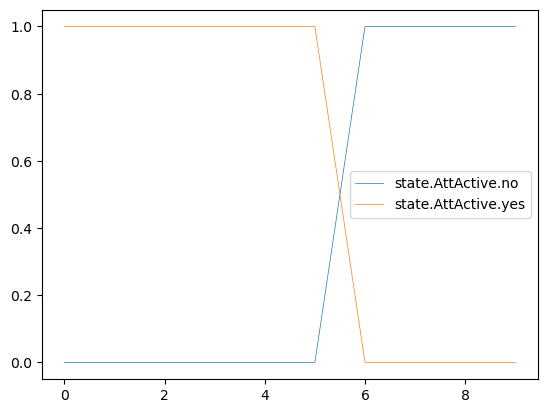

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0     PrivEscAcc   
3                   0.0                    1.0      FileRecon   
4                   0.0                    1.0      FileRecon   
5                   0.0                    1.0      FileRecon   
6                   0.0                    1.0           Exit   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

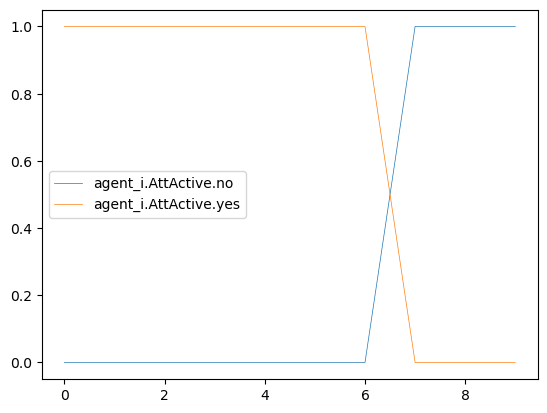

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.500000               0.500000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.093721               0.906279               Nop   
3              0.024975               0.975025               Nop   
4              0.051755               0.948245               Nop   
5              0.024480               0.975520               Nop   
6              0.042512               0.957488               Nop   
7              0.997223               0.002777               Nop   
8              0.999408               0.000592               Nop   
9              0.999440               0.000560               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

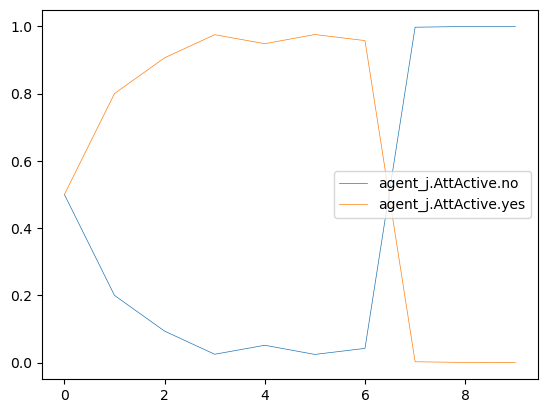

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0     PrivEscAcc   
3                   0.0                    1.0      FileRecon   
4                   0.0                    1.0      FileRecon   
5                   0.0                    1.0      FileRecon   
6                   0.0                    1.0           Exit   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

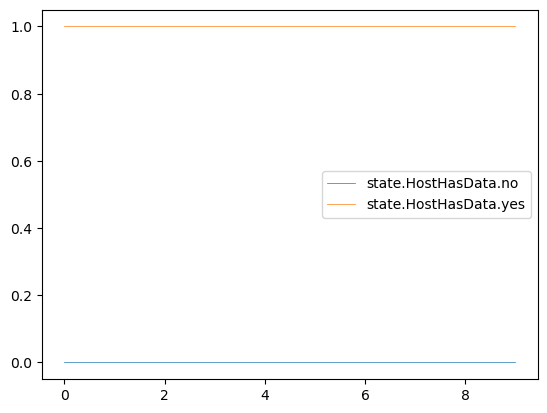

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.500000                 0.500000   EnumAccounts   
2                0.500000                 0.500000     PrivEscAcc   
3                0.500000                 0.500000      FileRecon   
4                0.833333                 0.166667      FileRecon   
5                0.929752                 0.070248      FileRecon   
6                0.992063                 0.007937           Exit   
7                0.992064                 0.007937            Nop   
8                0.992063                 0.007937            Nop   
9                0.992064                 0.007937            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

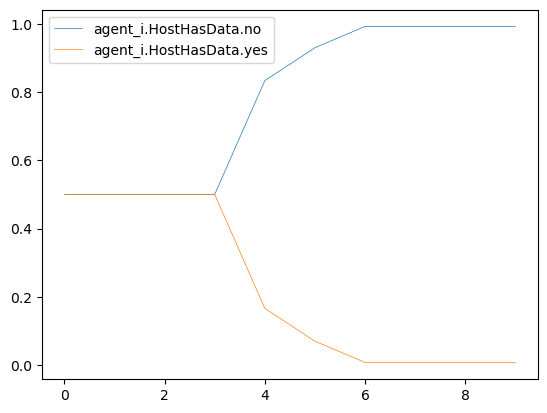

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

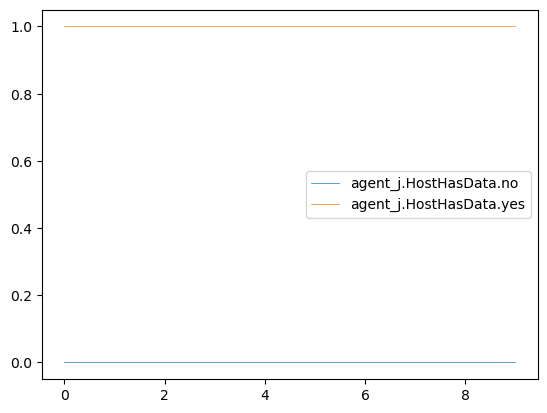

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0   EnumAccounts      DecoyAccount  
1                      1.0   EnumAccounts  RestrictAccPrivs  
2                      1.0     PrivEscAcc               Nop  
3                      1.0      FileRecon               Nop  
4                      1.0      FileRecon               Nop  
5                      1.0      FileRecon               Nop  
6                      1.0           Exit               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

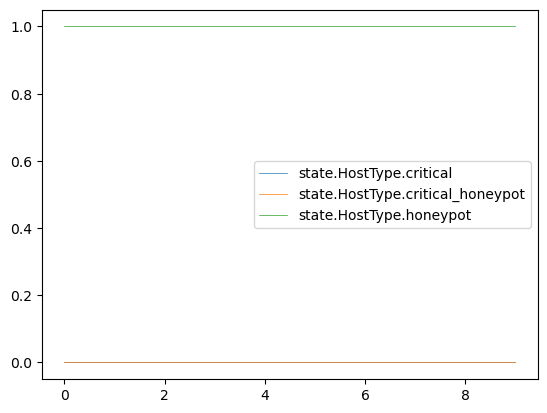

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0   EnumAccounts      DecoyAccount   
1                        0.0   EnumAccounts  RestrictAccPrivs   
2                        0.0     PrivEscAcc               Nop   
3                        0.0      FileRecon               Nop   
4                        0.0      FileRecon               Nop   
5                        0.0      FileRecon               Nop   
6                        0.0           Exit               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                            auth                         none   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

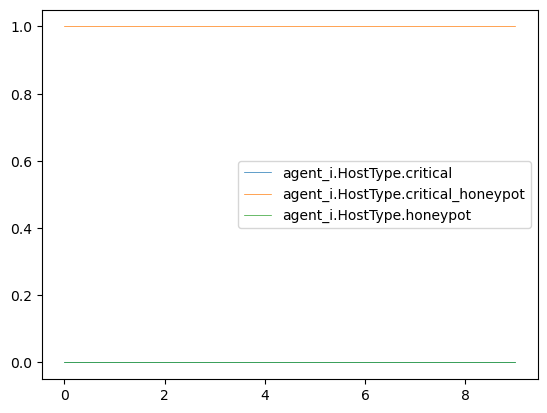

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0      DecoyAccount   EnumAccounts   
1                        1.0  RestrictAccPrivs   EnumAccounts   
2                        1.0               Nop     PrivEscAcc   
3                        1.0               Nop      FileRecon   
4                        1.0               Nop      FileRecon   
5                        1.0               Nop      FileRecon   
6                        1.0               Nop           Exit   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

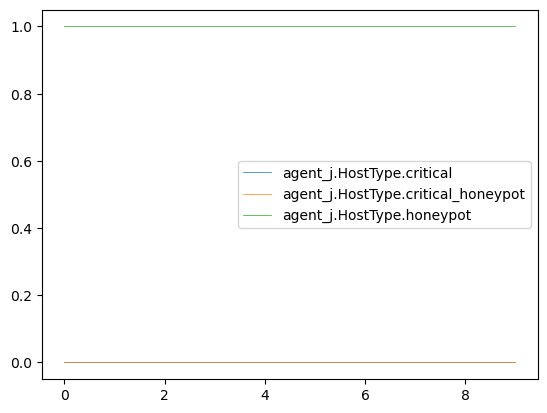

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0   EnumAccounts   
1                     0.0                     1.0   EnumAccounts   
2                     1.0                     0.0     PrivEscAcc   
3                     1.0                     0.0      FileRecon   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0      FileRecon   
6                     1.0                     0.0           Exit   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

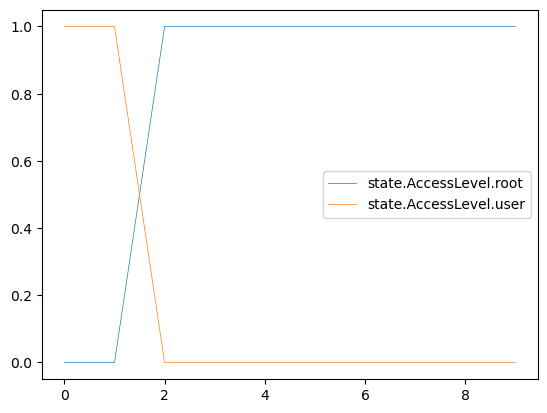

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       1.0                       0.0      FileRecon   
4                       1.0                       0.0      FileRecon   
5                       1.0                       0.0      FileRecon   
6                       1.0                       0.0           Exit   
7                       1.0                       0.0            Nop   
8                       1.0                       0.0            Nop   
9                       1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

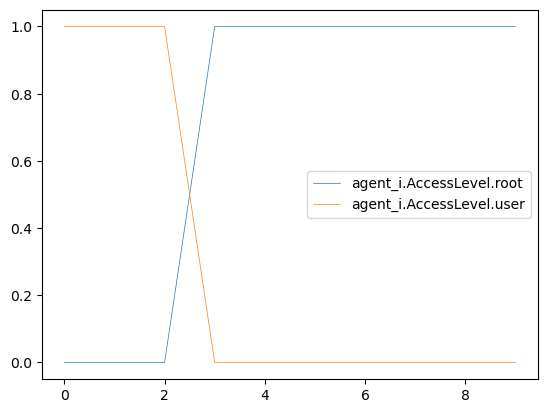

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.832645                  0.167355               Nop   
4                  0.899425                  0.100575               Nop   
5                  0.958139                  0.041861               Nop   
6                  0.991908                  0.008092               Nop   
7                  0.991801                  0.008199               Nop   
8                  0.991799                  0.008201               Nop   
9                  0.991799                  0.008201               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

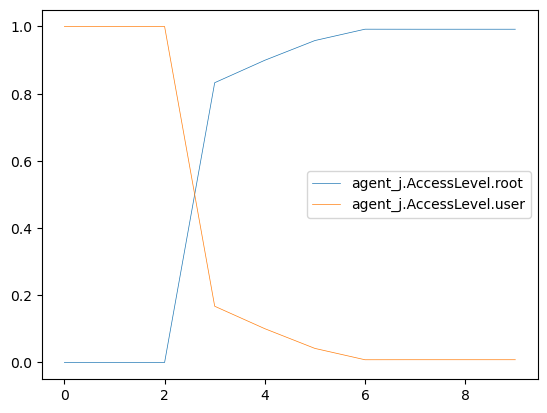

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0   EnumAccounts      DecoyAccount
1                 1.0                  0.0   EnumAccounts  RestrictAccPrivs
2                 1.0                  0.0     PrivEscAcc               Nop
3                 1.0                  0.0      FileRecon               Nop
4                 1.0                  0.0      FileRecon               Nop
5                 1.0                  0.0      FileRecon               Nop
6                 1.0                  0.0           Exit               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

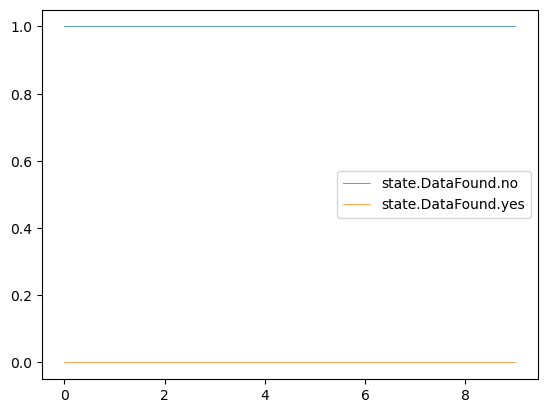

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0              1.000000               0.000000   EnumAccounts   
1              1.000000               0.000000   EnumAccounts   
2              1.000000               0.000000     PrivEscAcc   
3              1.000000               0.000000      FileRecon   
4              1.000000               0.000000      FileRecon   
5              0.966942               0.033058      FileRecon   
6              1.000000               0.000000           Exit   
7              1.000000               0.000000            Nop   
8              1.000000               0.000000            Nop   
9              1.000000               0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

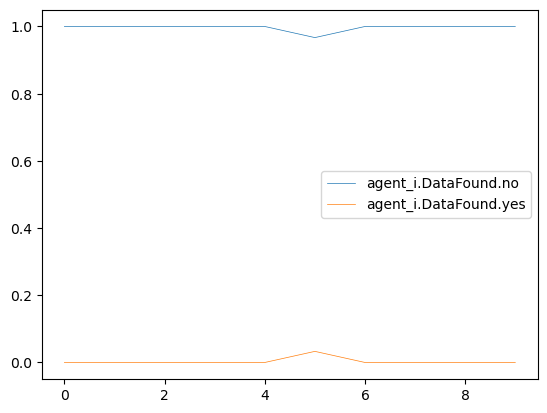

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.440000               0.560000  RestrictAccPrivs   
2              0.580131               0.419869               Nop   
3              0.670774               0.329226               Nop   
4              0.160448               0.839552               Nop   
5              0.057962               0.942038               Nop   
6              0.011760               0.988240               Nop   
7              0.011794               0.988206               Nop   
8              0.011796               0.988204               Nop   
9              0.011796               0.988204               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

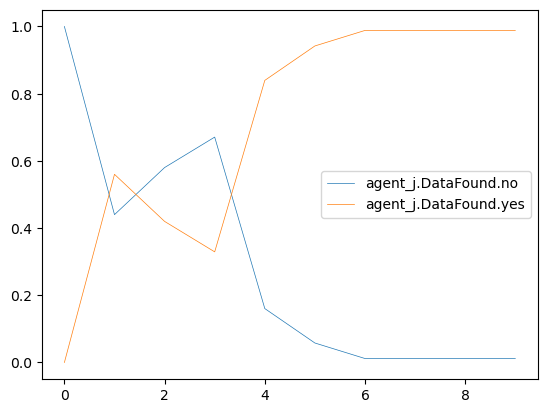

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0   EnumAccounts      DecoyAccount
1                   1.0                   0.0   EnumAccounts  RestrictAccPrivs
2                   1.0                   0.0     PrivEscAcc               Nop
3                   1.0                   0.0      FileRecon               Nop
4                   1.0                   0.0      FileRecon               Nop
5                   1.0                   0.0      FileRecon               Nop
6                   1.0                   0.0           Exit               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

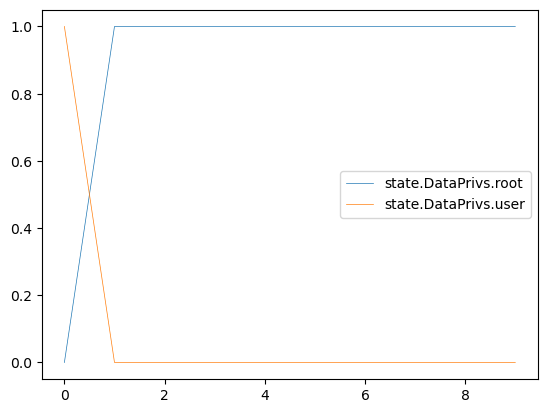

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571   EnumAccounts   
2                0.996943                0.003057     PrivEscAcc   
3                0.996938                0.003062      FileRecon   
4                0.996938                0.003062      FileRecon   
5                0.996938                0.003062      FileRecon   
6                0.996938                0.003062           Exit   
7                0.996938                0.003062            Nop   
8                0.996938                0.003062            Nop   
9                0.996938                0.003062            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

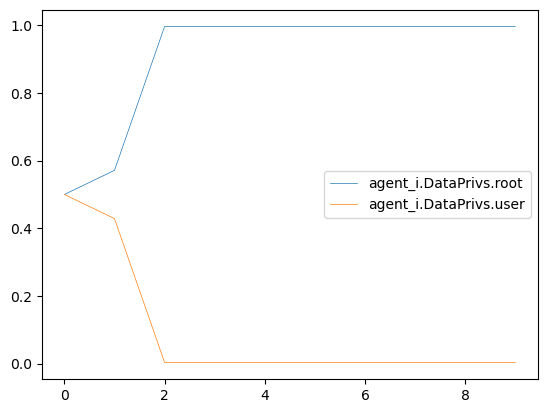

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

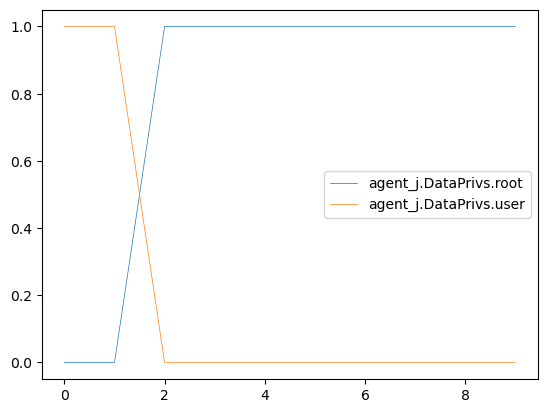

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0     PrivEscAcc   
3                   0.0                    1.0      FileRecon   
4                   0.0                    1.0      FileRecon   
5                   0.0                    1.0      FileRecon   
6                   0.0                    1.0           Exit   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

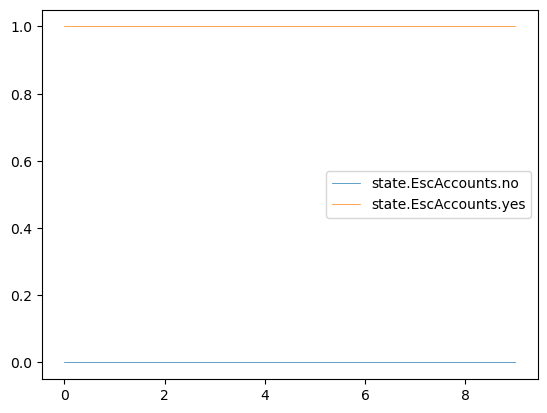

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.110837                 0.889163   EnumAccounts   
2                0.001053                 0.998947     PrivEscAcc   
3                0.000000                 1.000000      FileRecon   
4                0.000000                 1.000000      FileRecon   
5                0.000000                 1.000000      FileRecon   
6                0.000000                 1.000000           Exit   
7                0.000000                 1.000000            Nop   
8                0.000000                 1.000000            Nop   
9                0.000000                 1.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

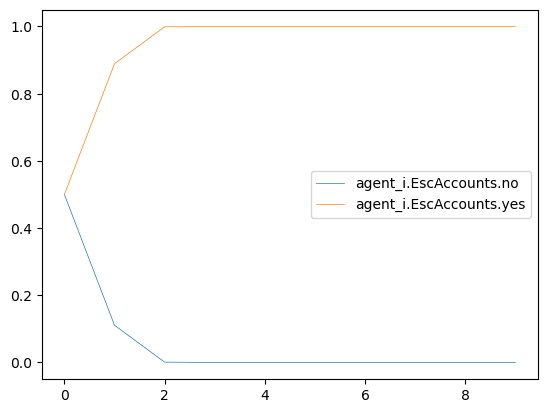

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                   login_activity  
4      FileRecon                        file_enum  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

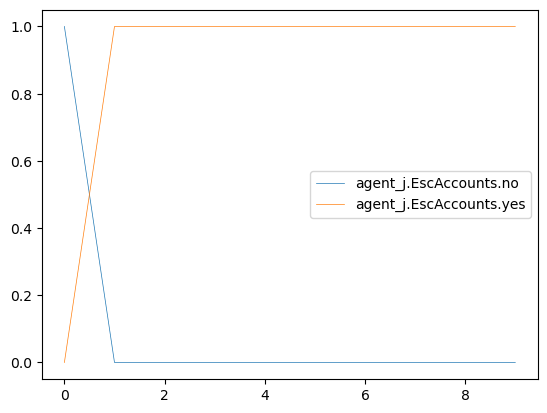

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.997698                        0.002302   
3                         0.998385                        0.001615   
4                         0.998385                        0.001615   
5                         0.998385                        0.001615   
6                         0.998386                        0.001615   
7                         0.998385                        0.001615   
8                         0.998386                        0.001615   
9                         0.998385                        0.001615   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

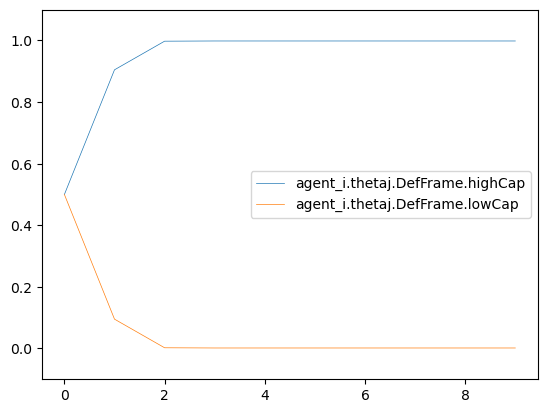

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

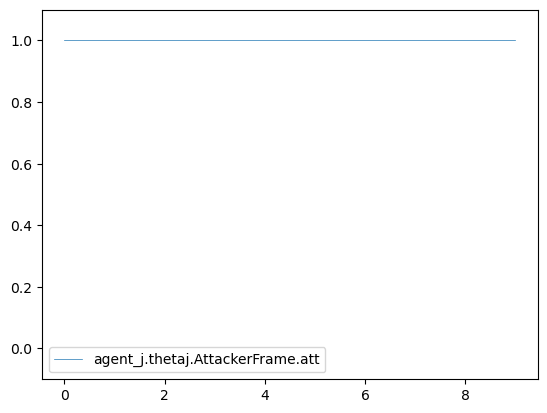

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0    EnumAccounts      DecoyAccount
1                0.0                 1.0    EnumAccounts  RestrictAccPrivs
2                0.0                 1.0      PrivEscAcc               Nop
3                0.0                 1.0       FileRecon               Nop
4                0.0                 1.0  ManipulateData               Nop
5                0.0                 1.0            Exit               Nop
6                0.0                 1.0             Nop               Nop
7                0.0                 1.0             Nop               Nop
8                0.0                 1.0             Nop               Nop
9                0.0                 1.0             Nop               Nop

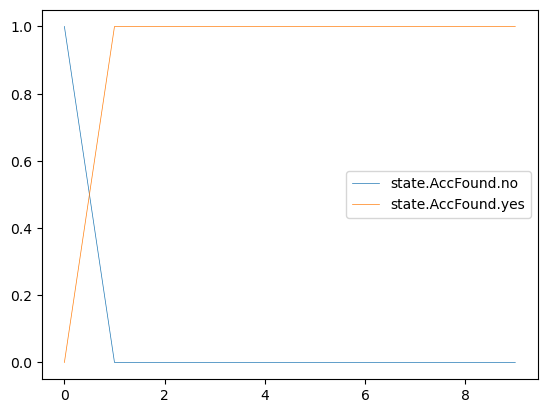

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.931034              0.068966    EnumAccounts   
2             0.025803              0.974198      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

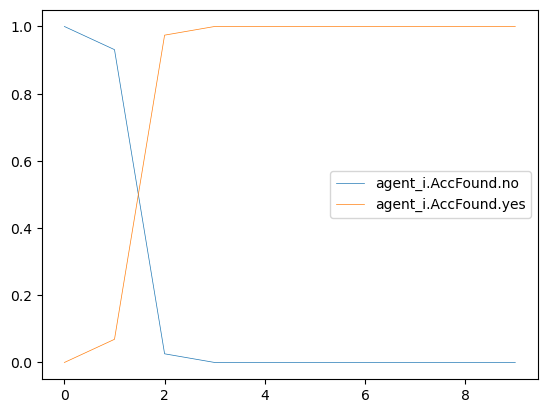

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.504030              0.495970               Nop   
3             0.103091              0.896909               Nop   
4             0.049851              0.950149               Nop   
5             0.010289              0.989711               Nop   
6             0.010698              0.989302               Nop   
7             0.010698              0.989302               Nop   
8             0.010698              0.989302               Nop   
9             0.010698              0.989302               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

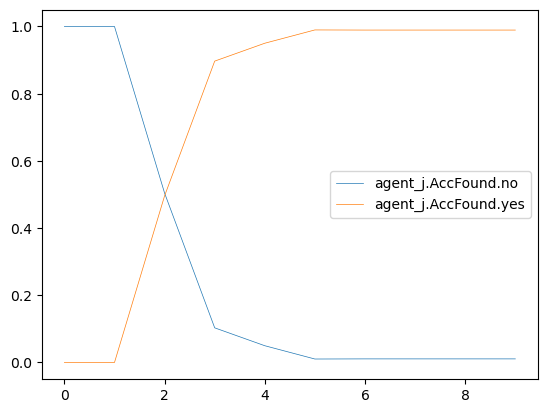

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0    EnumAccounts   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    0.0                     1.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

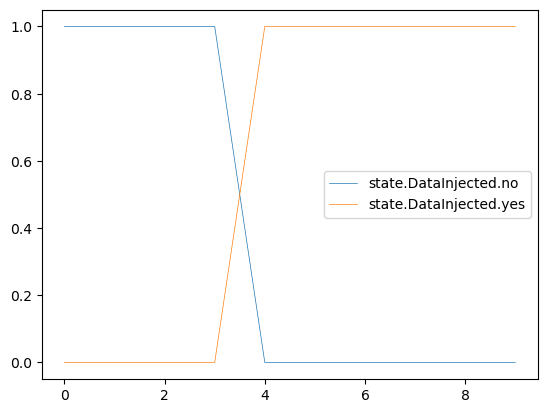

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000042                  0.999958            Exit   
6                 0.000042                  0.999958             Nop   
7                 0.000042                  0.999958             Nop   
8                 0.000042                  0.999958             Nop   
9                 0.000042                  0.999958             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

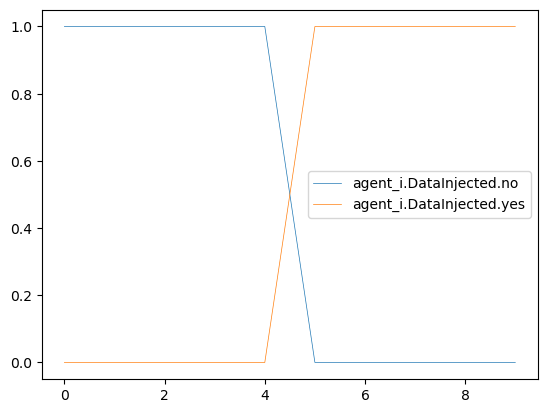

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.763824                  0.236176               Nop   
3                 0.937064                  0.062936               Nop   
4                 0.974156                  0.025844               Nop   
5                 0.055020                  0.944980               Nop   
6                 0.015015                  0.984985               Nop   
7                 0.013677                  0.986323               Nop   
8                 0.013677                  0.986323               Nop   
9                 0.013677                  0.986323               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

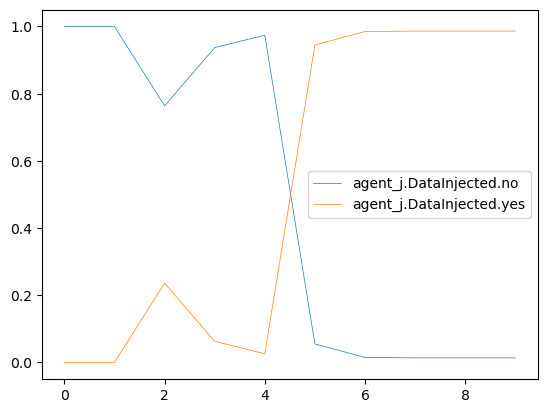

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0    EnumAccounts      DecoyAccount
1                 0.0                  1.0    EnumAccounts  RestrictAccPrivs
2                 0.0                  1.0      PrivEscAcc               Nop
3                 0.0                  1.0       FileRecon               Nop
4                 0.0                  1.0  ManipulateData               Nop
5                 1.0                  0.0            Exit               Nop
6                 1.0                  0.0             Nop               Nop
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

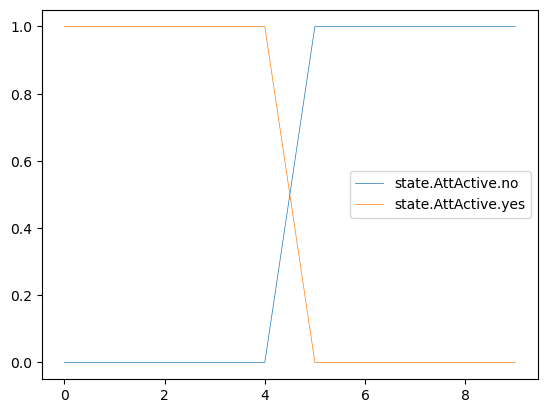

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

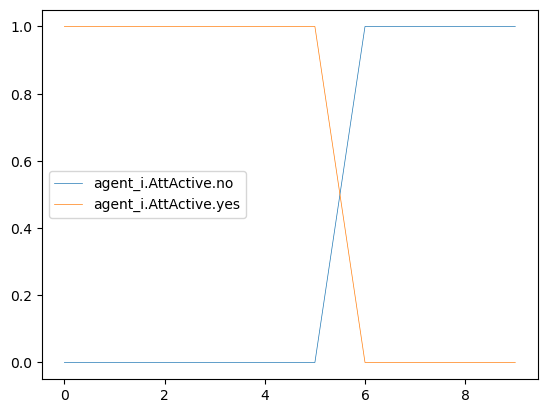

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.500000               0.500000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.093721               0.906279               Nop   
3              0.024975               0.975025               Nop   
4              0.010654               0.989346               Nop   
5              0.010137               0.989863               Nop   
6              0.992988               0.007012               Nop   
7              0.998115               0.001885               Nop   
8              0.999613               0.000387               Nop   
9              0.999613               0.000387               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

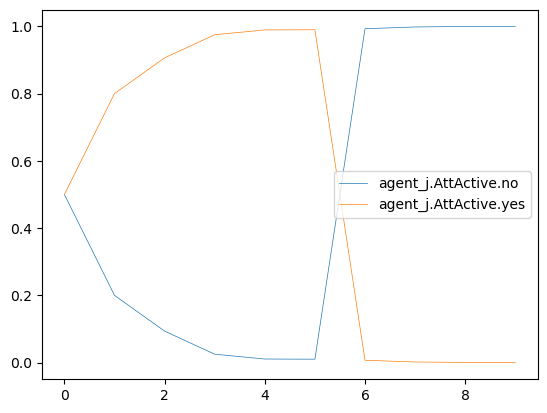

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

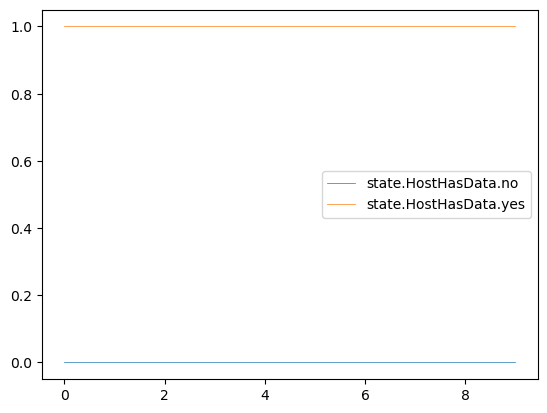

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.064103                 0.935897  ManipulateData   
5                0.000035                 0.999965            Exit   
6                0.000035                 0.999965             Nop   
7                0.000035                 0.999965             Nop   
8                0.000035                 0.999965             Nop   
9                0.000035                 0.999965             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

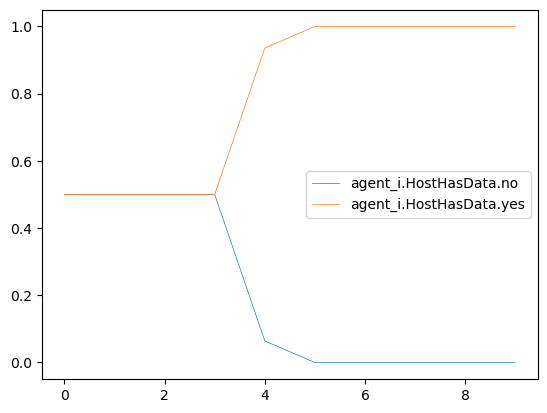

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

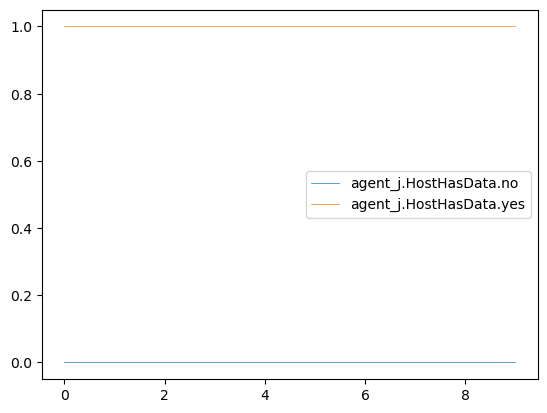

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0    EnumAccounts      DecoyAccount  
1                      1.0    EnumAccounts  RestrictAccPrivs  
2                      1.0      PrivEscAcc               Nop  
3                      1.0       FileRecon               Nop  
4                      1.0  ManipulateData               Nop  
5                      1.0            Exit               Nop  
6                      1.0             Nop               Nop  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

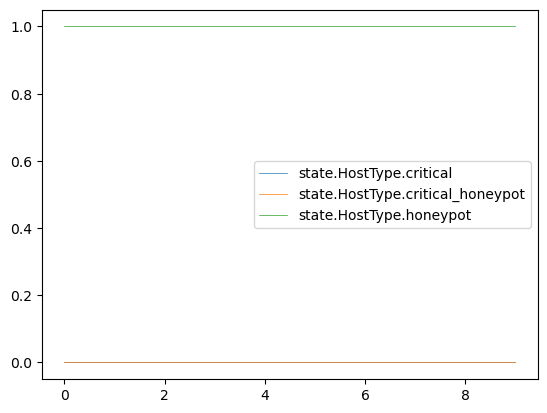

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0    EnumAccounts      DecoyAccount   
1                        0.0    EnumAccounts  RestrictAccPrivs   
2                        0.0      PrivEscAcc               Nop   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

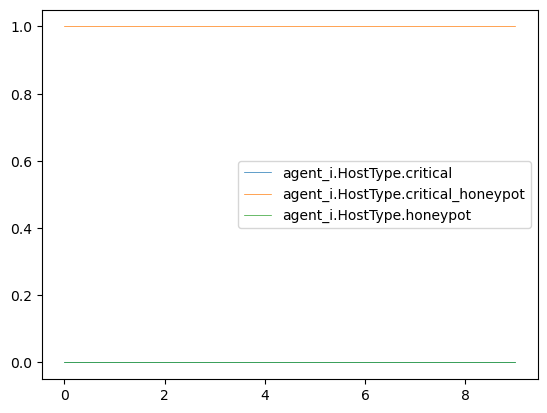

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  RestrictAccPrivs    EnumAccounts   
2                        1.0               Nop      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                        file_enum  
9                             none

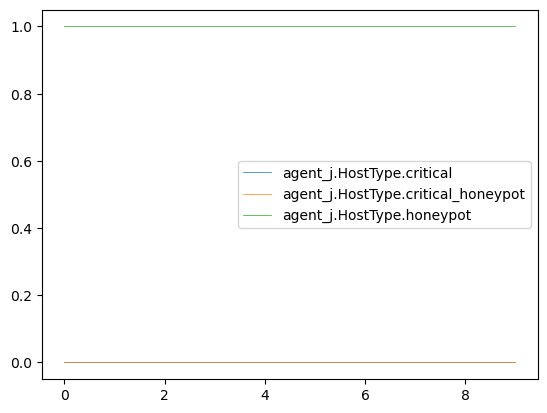

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0    EnumAccounts   
1                     0.0                     1.0    EnumAccounts   
2                     1.0                     0.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

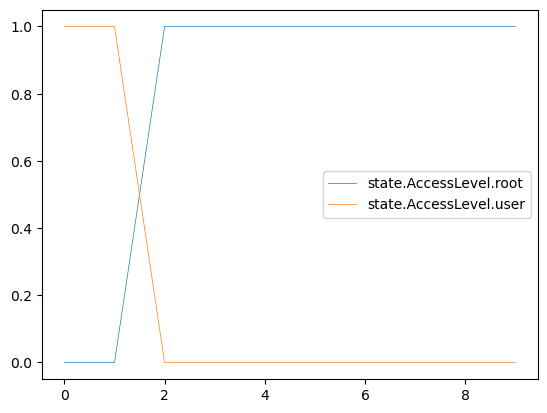

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

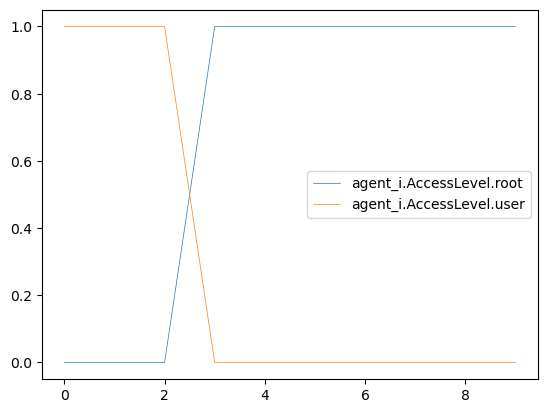

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.832645                  0.167355               Nop   
4                  0.942297                  0.057703               Nop   
5                  0.988248                  0.011752               Nop   
6                  0.987781                  0.012219               Nop   
7                  0.987781                  0.012219               Nop   
8                  0.987781                  0.012219               Nop   
9                  0.987781                  0.012219               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

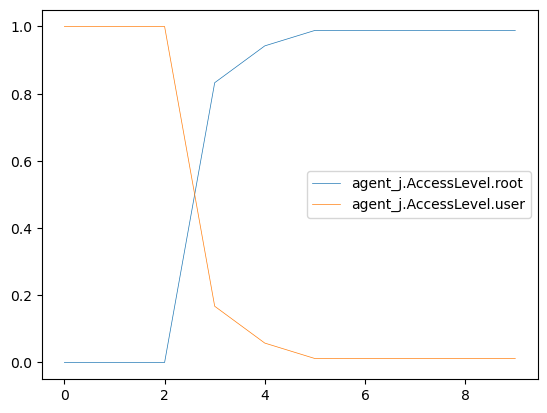

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0    EnumAccounts      DecoyAccount
1                 1.0                  0.0    EnumAccounts  RestrictAccPrivs
2                 1.0                  0.0      PrivEscAcc               Nop
3                 0.0                  1.0       FileRecon               Nop
4                 0.0                  1.0  ManipulateData               Nop
5                 0.0                  1.0            Exit               Nop
6                 0.0                  1.0             Nop               Nop
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

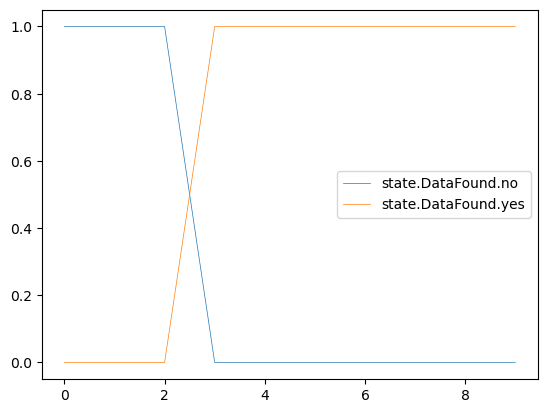

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.076923               0.923077  ManipulateData   
5              0.000042               0.999958            Exit   
6              0.000042               0.999958             Nop   
7              0.000042               0.999958             Nop   
8              0.000042               0.999958             Nop   
9              0.000042               0.999958             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

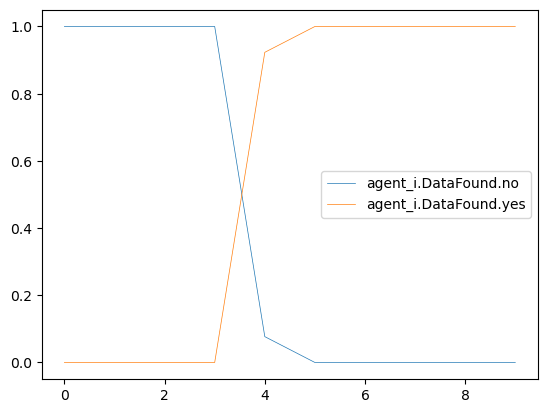

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.440000               0.560000  RestrictAccPrivs   
2              0.580131               0.419869               Nop   
3              0.670774               0.329226               Nop   
4              0.161074               0.838926               Nop   
5              0.019696               0.980304               Nop   
6              0.010631               0.989369               Nop   
7              0.010631               0.989369               Nop   
8              0.010631               0.989369               Nop   
9              0.010631               0.989369               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

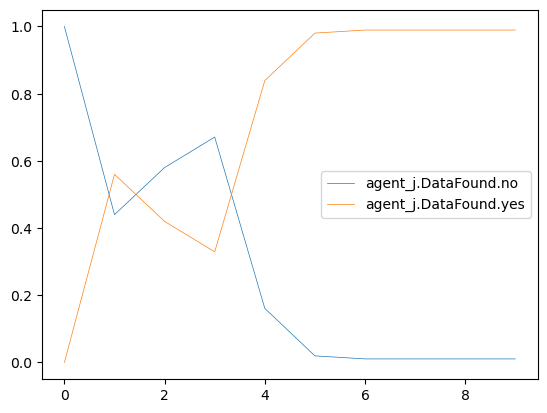

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0    EnumAccounts   
1                   1.0                   0.0    EnumAccounts   
2                   1.0                   0.0      PrivEscAcc   
3                   1.0                   0.0       FileRecon   
4                   1.0                   0.0  ManipulateData   
5                   1.0                   0.0            Exit   
6                   1.0                   0.0             Nop   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

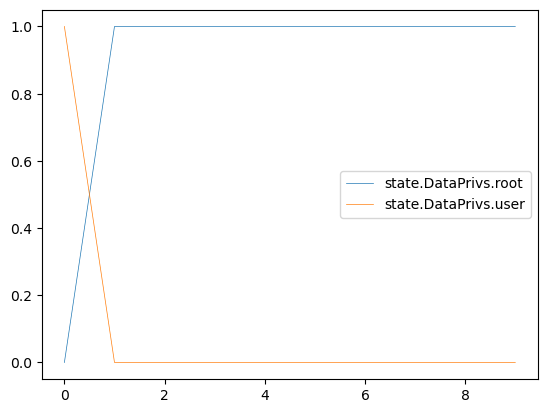

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.571429                0.428571    EnumAccounts   
2                0.996943                0.003057      PrivEscAcc   
3                0.996938                0.003062       FileRecon   
4                0.996938                0.003062  ManipulateData   
5                0.996938                0.003062            Exit   
6                0.996938                0.003062             Nop   
7                0.996938                0.003062             Nop   
8                0.996938                0.003062             Nop   
9                0.996938                0.003062             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

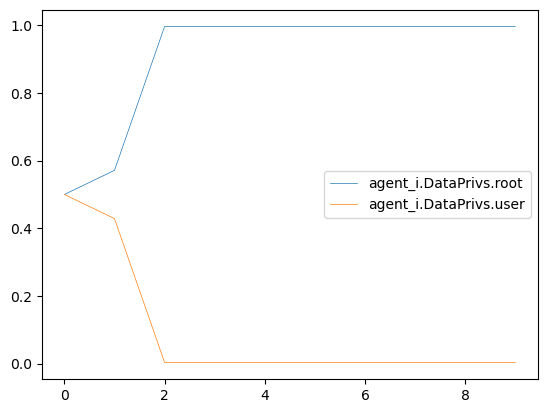

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

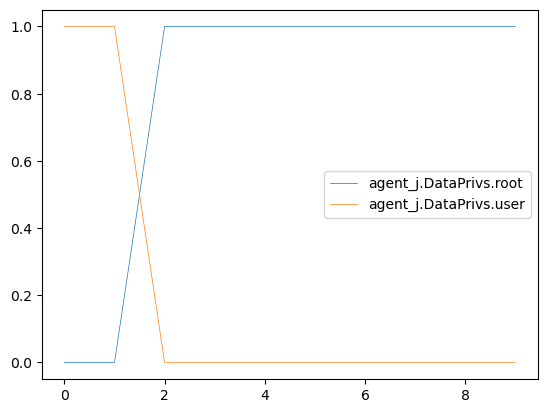

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

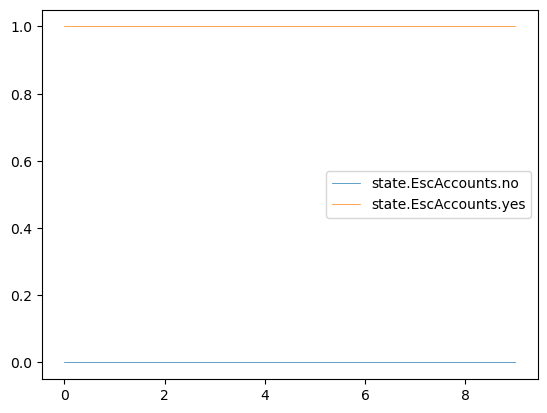

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.110837                 0.889163    EnumAccounts   
2                0.001053                 0.998947      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

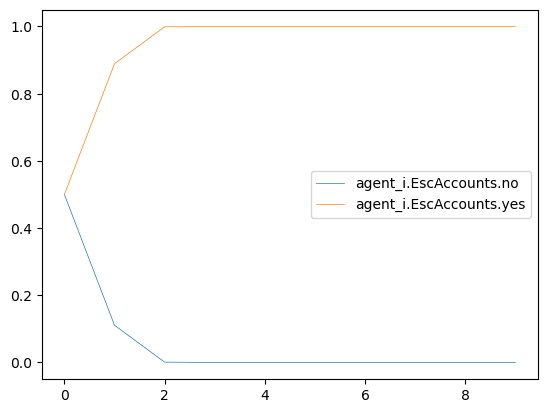

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

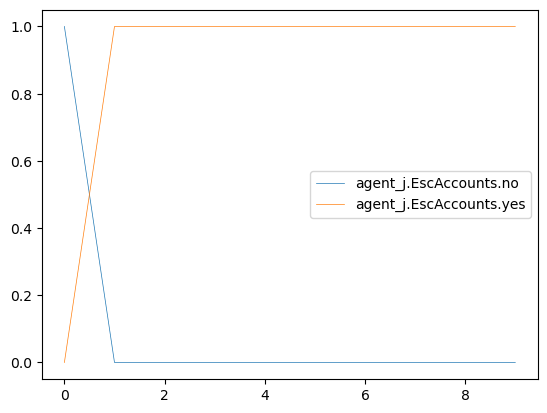

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.487398                        0.512602   
3                         0.722601                        0.277399   
4                         0.876830                        0.123170   
5                         0.876830                        0.123170   
6                         0.876830                        0.123170   
7                         0.876830                        0.123170   
8                         0.876830                        0.123170   
9                         0.876830                        0.123170   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                   user_files   
4                          denied                         none   
5                            auth                         none   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           failure                          active   
5                           success                          active   
6                           success                          active   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

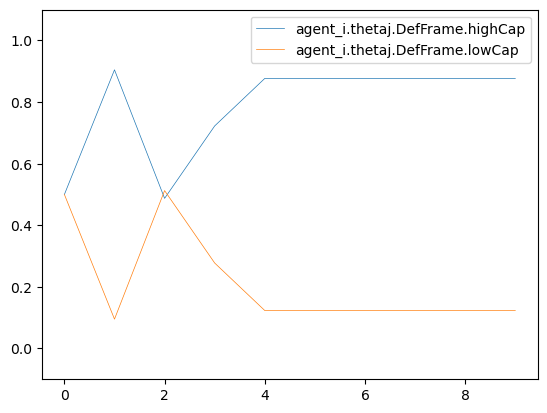

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

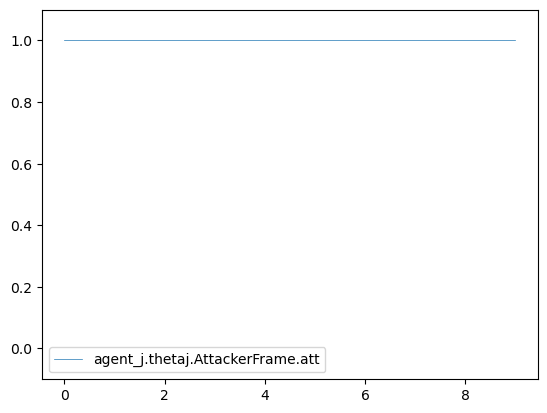

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0    EnumAccounts      DecoyAccount
1                1.0                 0.0    EnumAccounts  RestrictAccPrivs
2                0.0                 1.0    EnumAccounts               Nop
3                0.0                 1.0      PrivEscAcc               Nop
4                0.0                 1.0       FileRecon               Nop
5                0.0                 1.0       FileRecon               Nop
6                0.0                 1.0  ManipulateData               Nop
7                0.0                 1.0            Exit               Nop
8                0.0                 1.0             Nop               Nop
9                0.0                 1.0             Nop               Nop

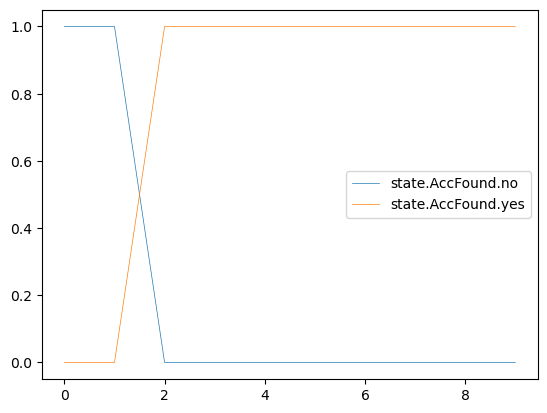

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.931034              0.068966    EnumAccounts   
2             0.904545              0.095455    EnumAccounts   
3             0.217317              0.782683      PrivEscAcc   
4             0.000000              1.000000       FileRecon   
5             0.000000              1.000000       FileRecon   
6             0.000000              1.000000  ManipulateData   
7             0.000000              1.000000            Exit   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

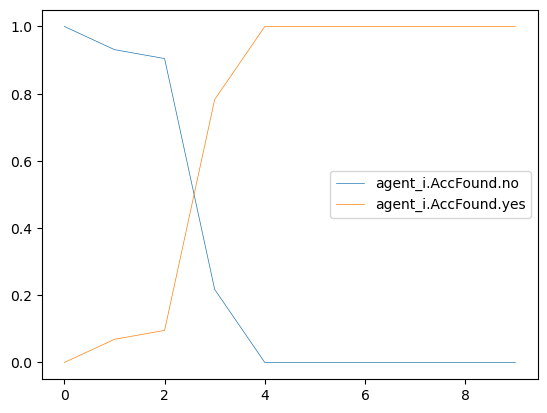

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.504030              0.495970               Nop   
3             0.372920              0.627080               Nop   
4             0.359585              0.640415               Nop   
5             0.165027              0.834973               Nop   
6             0.118958              0.881042               Nop   
7             0.043798              0.956202               Nop   
8             0.044069              0.955931               Nop   
9             0.044069              0.955931               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

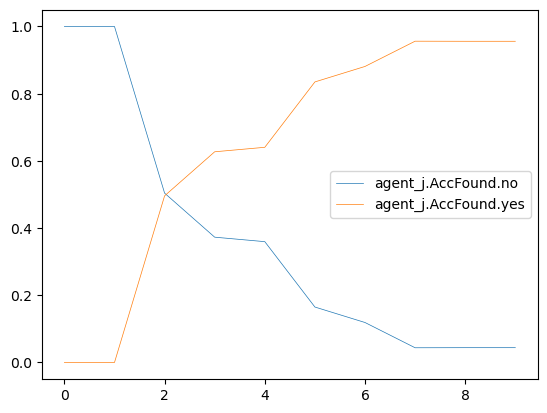

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0    EnumAccounts   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0    EnumAccounts   
3                    1.0                     0.0      PrivEscAcc   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0       FileRecon   
6                    0.0                     1.0  ManipulateData   
7                    0.0                     1.0            Exit   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

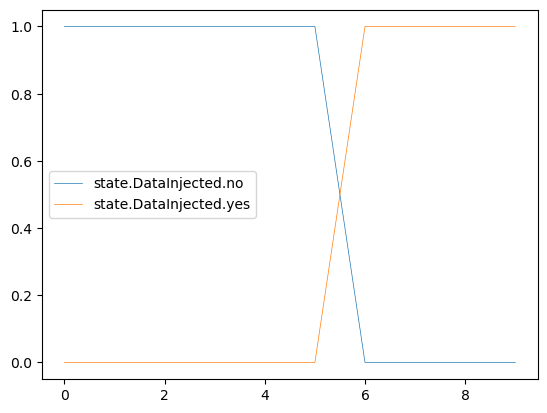

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.000181                  0.999819            Exit   
8                 0.000181                  0.999819             Nop   
9                 0.000181                  0.999819             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

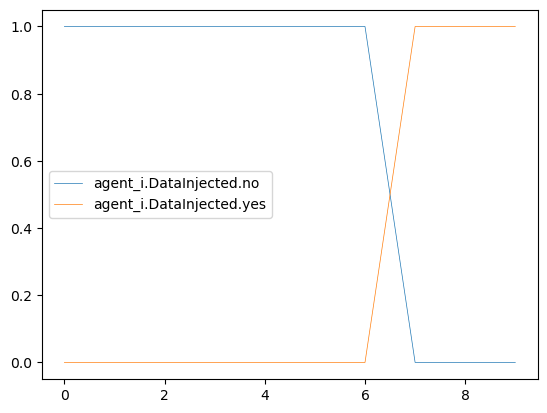

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.763824                  0.236176               Nop   
3                 0.514308                  0.485692               Nop   
4                 0.517489                  0.482512               Nop   
5                 0.311943                  0.688058               Nop   
6                 0.188679                  0.811321               Nop   
7                 0.033968                  0.966032               Nop   
8                 0.033959                  0.966041               Nop   
9                 0.033959                  0.966041               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

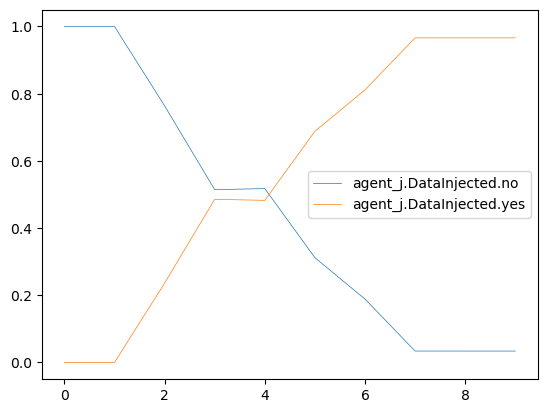

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0    EnumAccounts      DecoyAccount
1                 0.0                  1.0    EnumAccounts  RestrictAccPrivs
2                 0.0                  1.0    EnumAccounts               Nop
3                 0.0                  1.0      PrivEscAcc               Nop
4                 0.0                  1.0       FileRecon               Nop
5                 0.0                  1.0       FileRecon               Nop
6                 0.0                  1.0  ManipulateData               Nop
7                 1.0                  0.0            Exit               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

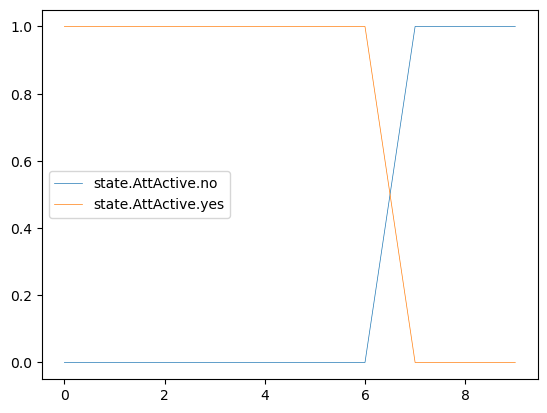

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0       FileRecon   
6                   0.0                    1.0  ManipulateData   
7                   0.0                    1.0            Exit   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

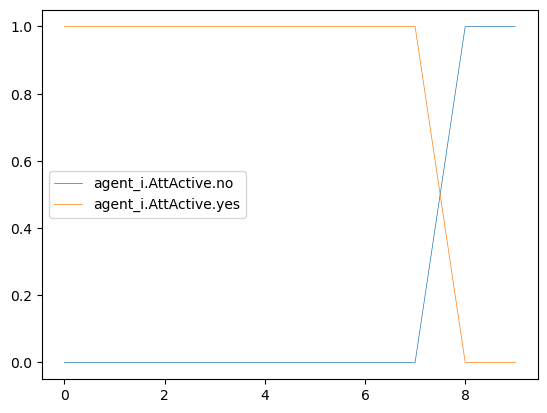

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.500000               0.500000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.093721               0.906279               Nop   
3              0.027534               0.972466               Nop   
4              0.134797               0.865203               Nop   
5              0.214172               0.785828               Nop   
6              0.268112               0.731888               Nop   
7              0.254296               0.745704               Nop   
8              0.998355               0.001645               Nop   
9              0.999384               0.000615               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

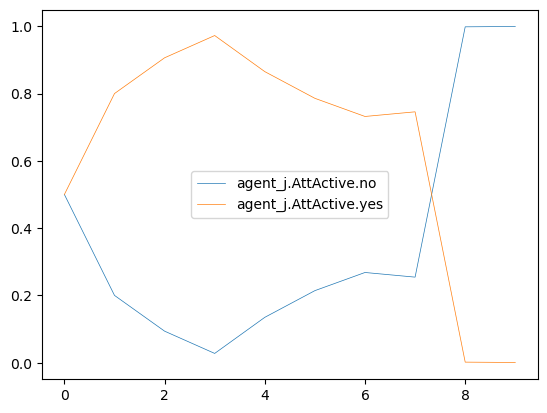

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0       FileRecon   
6                   0.0                    1.0  ManipulateData   
7                   0.0                    1.0            Exit   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

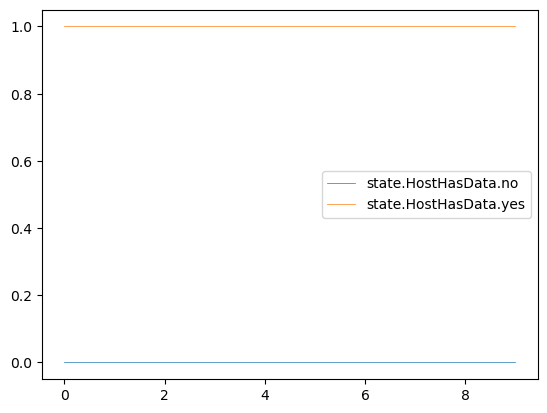

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000    EnumAccounts   
3                0.500000                 0.500000      PrivEscAcc   
4                0.500000                 0.500000       FileRecon   
5                0.833333                 0.166667       FileRecon   
6                0.255102                 0.744898  ManipulateData   
7                0.000174                 0.999826            Exit   
8                0.000174                 0.999826             Nop   
9                0.000174                 0.999826             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

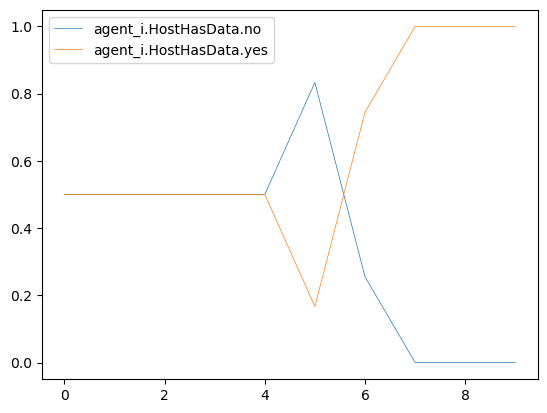

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

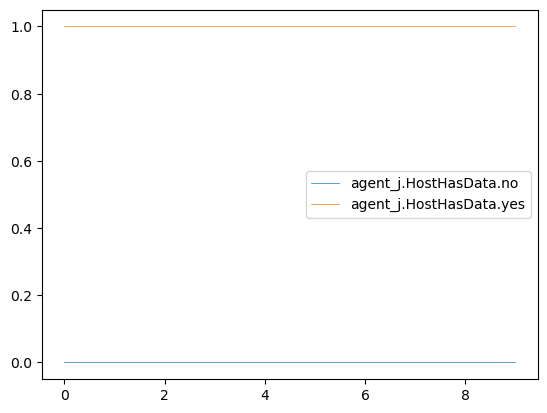

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0    EnumAccounts      DecoyAccount  
1                      1.0    EnumAccounts  RestrictAccPrivs  
2                      1.0    EnumAccounts               Nop  
3                      1.0      PrivEscAcc               Nop  
4                      1.0       FileRecon               Nop  
5                      1.0       FileRecon               Nop  
6                      1.0  ManipulateData               Nop  
7                      1.0            Exit               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

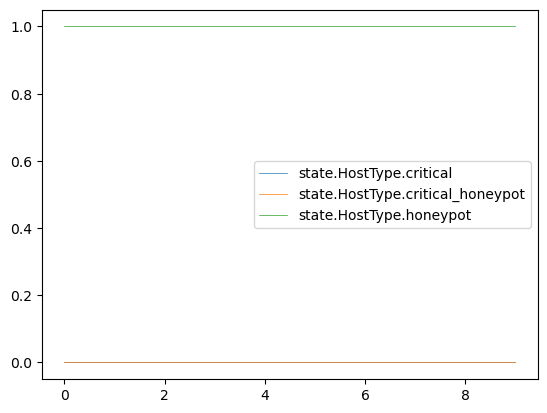

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0    EnumAccounts      DecoyAccount   
1                        0.0    EnumAccounts  RestrictAccPrivs   
2                        0.0    EnumAccounts               Nop   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0       FileRecon               Nop   
6                        0.0  ManipulateData               Nop   
7                        0.0            Exit               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                   user_files   
4                          denied                         none   
5                            auth                         none   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           failure                          active   
5                           success                          active   
6                           success                          active   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

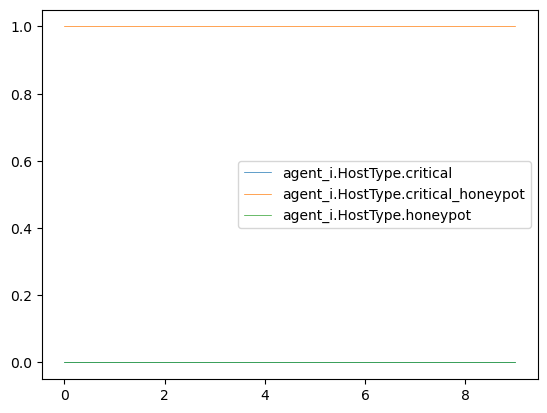

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  RestrictAccPrivs    EnumAccounts   
2                        1.0               Nop    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop       FileRecon   
6                        1.0               Nop  ManipulateData   
7                        1.0               Nop            Exit   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                        file_enum  
9                             none

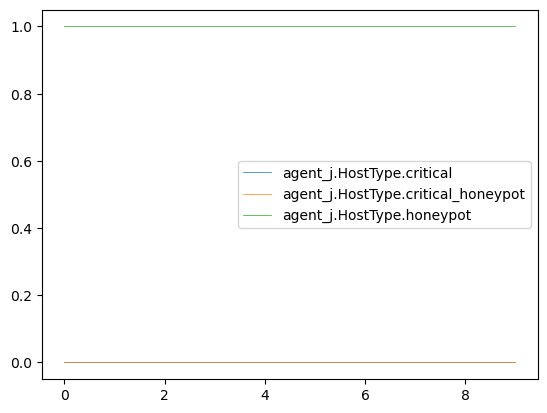

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0    EnumAccounts   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0    EnumAccounts   
3                     1.0                     0.0      PrivEscAcc   
4                     1.0                     0.0       FileRecon   
5                     1.0                     0.0       FileRecon   
6                     1.0                     0.0  ManipulateData   
7                     1.0                     0.0            Exit   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

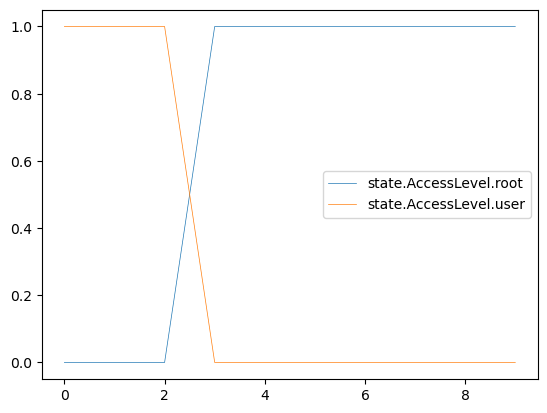

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0      PrivEscAcc   
4                       1.0                       0.0       FileRecon   
5                       1.0                       0.0       FileRecon   
6                       1.0                       0.0  ManipulateData   
7                       1.0                       0.0            Exit   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

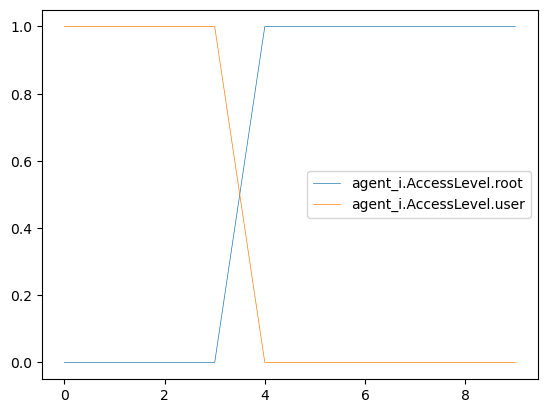

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.131137                  0.868863               Nop   
4                  0.493819                  0.506181               Nop   
5                  0.771728                  0.228272               Nop   
6                  0.835453                  0.164547               Nop   
7                  0.939416                  0.060584               Nop   
8                  0.939042                  0.060958               Nop   
9                  0.939042                  0.060958               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

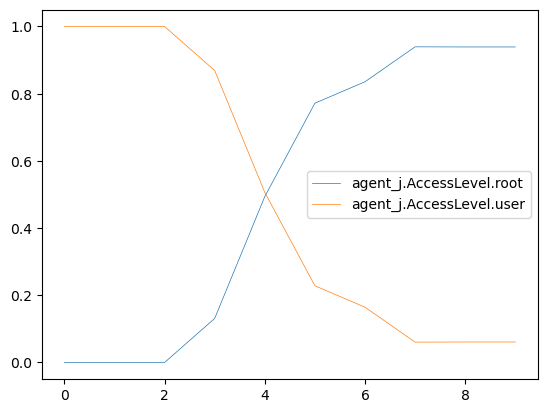

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0    EnumAccounts      DecoyAccount
1                 1.0                  0.0    EnumAccounts  RestrictAccPrivs
2                 1.0                  0.0    EnumAccounts               Nop
3                 1.0                  0.0      PrivEscAcc               Nop
4                 1.0                  0.0       FileRecon               Nop
5                 0.0                  1.0       FileRecon               Nop
6                 0.0                  1.0  ManipulateData               Nop
7                 0.0                  1.0            Exit               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

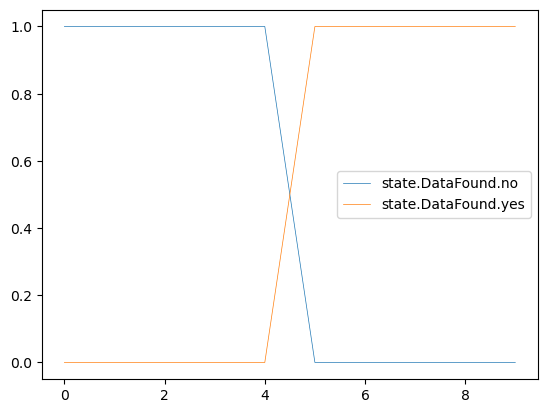

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000    EnumAccounts   
3              1.000000               0.000000      PrivEscAcc   
4              1.000000               0.000000       FileRecon   
5              1.000000               0.000000       FileRecon   
6              0.265306               0.734694  ManipulateData   
7              0.000181               0.999819            Exit   
8              0.000181               0.999819             Nop   
9              0.000181               0.999819             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

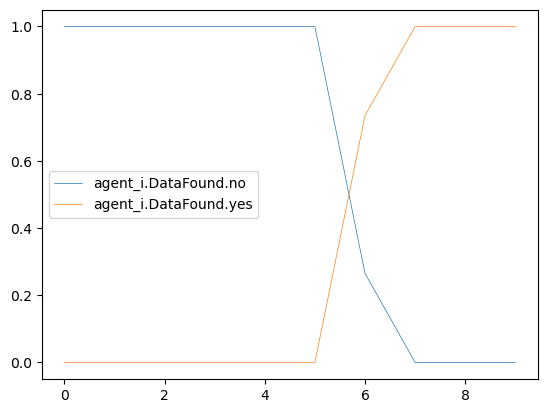

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.440000               0.560000  RestrictAccPrivs   
2              0.580131               0.419869               Nop   
3              0.376155               0.623845               Nop   
4              0.170348               0.829652               Nop   
5              0.082172               0.917828               Nop   
6              0.061624               0.938376               Nop   
7              0.023533               0.976467               Nop   
8              0.023678               0.976322               Nop   
9              0.023678               0.976322               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

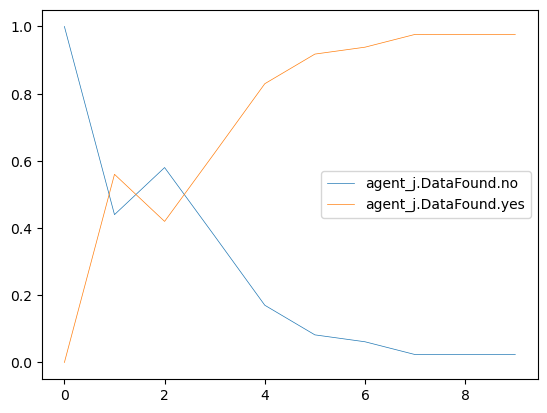

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0    EnumAccounts   
1                   1.0                   0.0    EnumAccounts   
2                   1.0                   0.0    EnumAccounts   
3                   1.0                   0.0      PrivEscAcc   
4                   1.0                   0.0       FileRecon   
5                   1.0                   0.0       FileRecon   
6                   1.0                   0.0  ManipulateData   
7                   1.0                   0.0            Exit   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

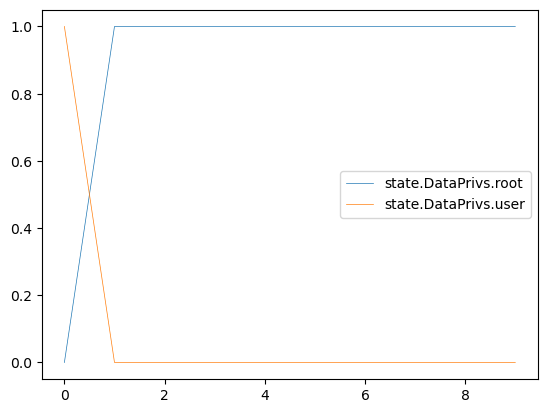

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.571429                0.428571    EnumAccounts   
2                0.922967                0.077033    EnumAccounts   
3                0.771744                0.228256      PrivEscAcc   
4                0.713323                0.286677       FileRecon   
5                0.713323                0.286677       FileRecon   
6                0.713323                0.286677  ManipulateData   
7                0.713323                0.286677            Exit   
8                0.713323                0.286677             Nop   
9                0.713323                0.286677             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

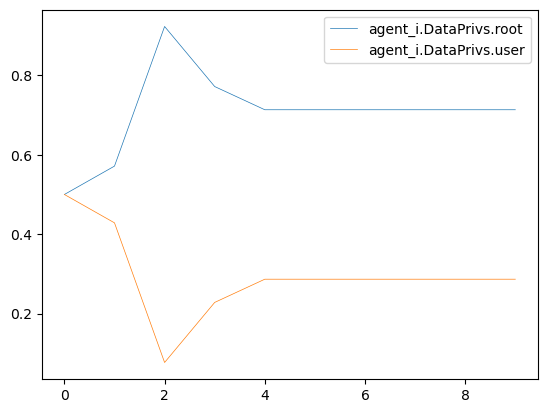

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

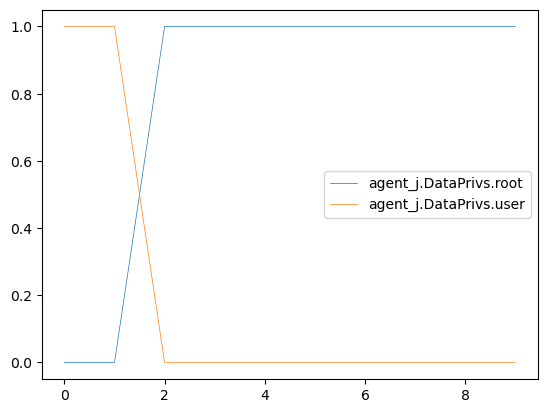

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0       FileRecon   
6                   0.0                    1.0  ManipulateData   
7                   0.0                    1.0            Exit   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

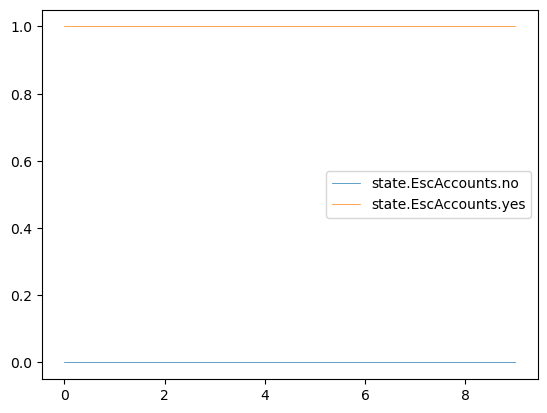

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.110837                 0.889163    EnumAccounts   
2                0.720179                 0.279821    EnumAccounts   
3                0.204049                 0.795951      PrivEscAcc   
4                0.000000                 1.000000       FileRecon   
5                0.000000                 1.000000       FileRecon   
6                0.000000                 1.000000  ManipulateData   
7                0.000000                 1.000000            Exit   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

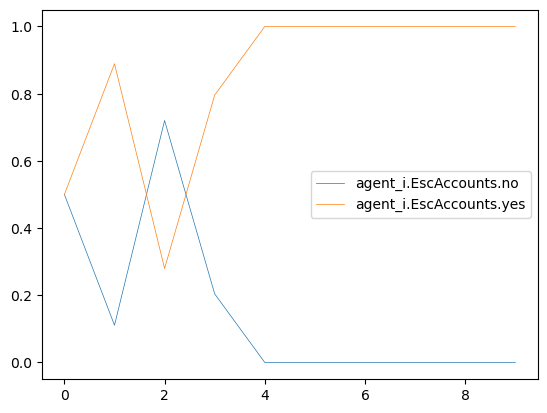

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

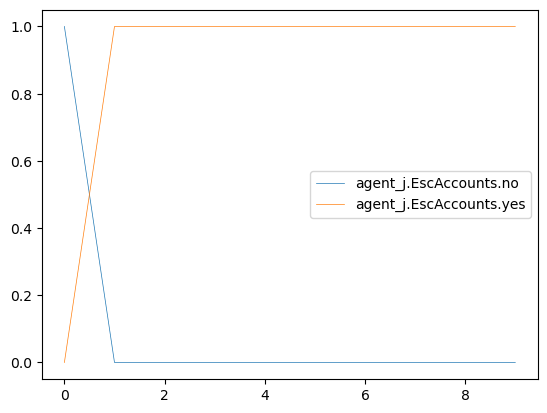

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.997698                        0.002302   
3                         0.998385                        0.001615   
4                         0.998385                        0.001615   
5                         0.998385                        0.001615   
6                         0.998386                        0.001615   
7                         0.998385                        0.001615   
8                         0.998386                        0.001615   
9                         0.998385                        0.001615   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

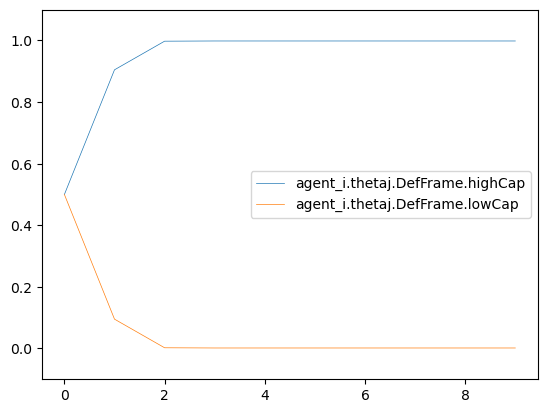

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                             none
4                               1.0                       file_write
5                               1.0                   login_activity
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                   login_activity

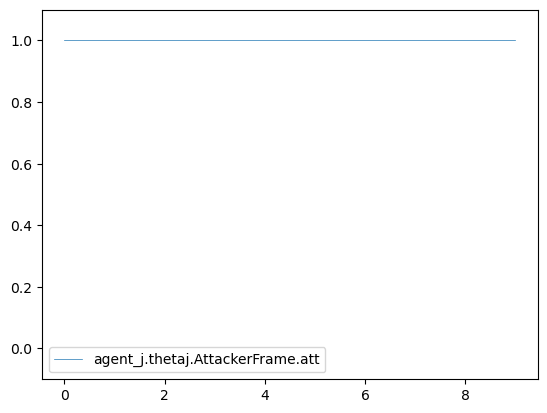

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0    EnumAccounts      DecoyAccount
1                0.0                 1.0    EnumAccounts  RestrictAccPrivs
2                0.0                 1.0      PrivEscAcc               Nop
3                0.0                 1.0       FileRecon               Nop
4                0.0                 1.0  ManipulateData               Nop
5                0.0                 1.0            Exit               Nop
6                0.0                 1.0             Nop               Nop
7                0.0                 1.0             Nop               Nop
8                0.0                 1.0             Nop               Nop
9                0.0                 1.0             Nop               Nop

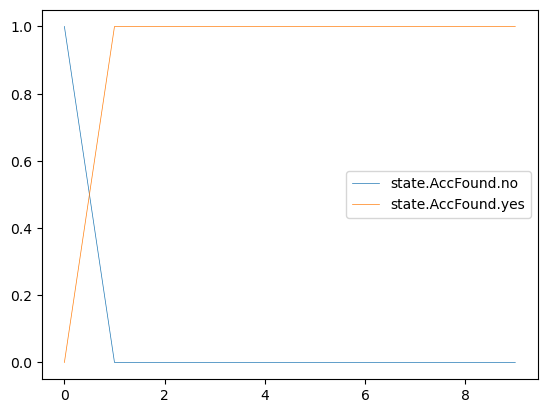

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.931034              0.068966    EnumAccounts   
2             0.025803              0.974198      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

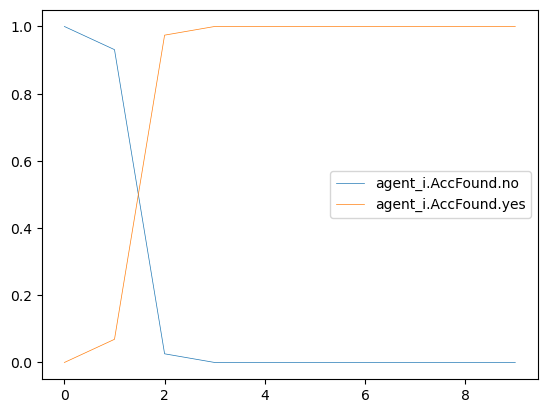

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.504030              0.495970               Nop   
3             0.103091              0.896909               Nop   
4             0.339352              0.660648               Nop   
5             0.093907              0.906093               Nop   
6             0.093907              0.906093               Nop   
7             0.094699              0.905301               Nop   
8             0.094700              0.905300               Nop   
9             0.094700              0.905300               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

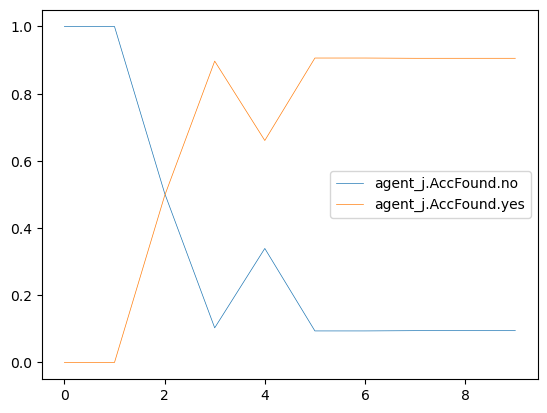

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0    EnumAccounts   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    0.0                     1.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

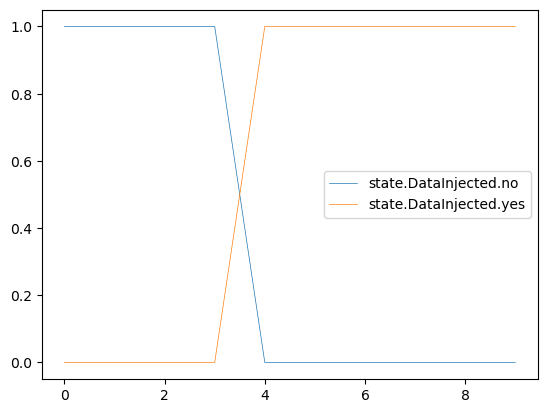

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000042                  0.999958            Exit   
6                 0.000042                  0.999958             Nop   
7                 0.000042                  0.999958             Nop   
8                 0.000042                  0.999958             Nop   
9                 0.000042                  0.999958             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

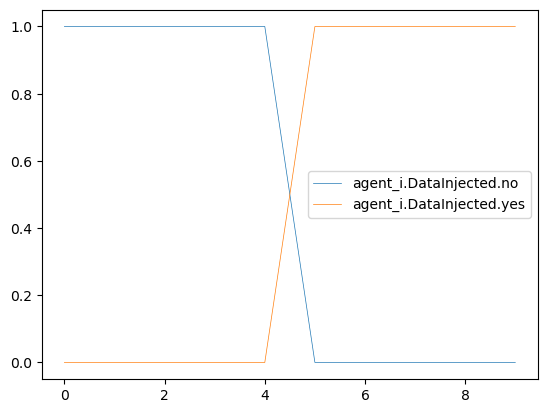

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.763824                  0.236176               Nop   
3                 0.937064                  0.062936               Nop   
4                 0.957286                  0.042714               Nop   
5                 0.150026                  0.849974               Nop   
6                 0.123059                  0.876941               Nop   
7                 0.115898                  0.884102               Nop   
8                 0.115899                  0.884101               Nop   
9                 0.115899                  0.884101               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

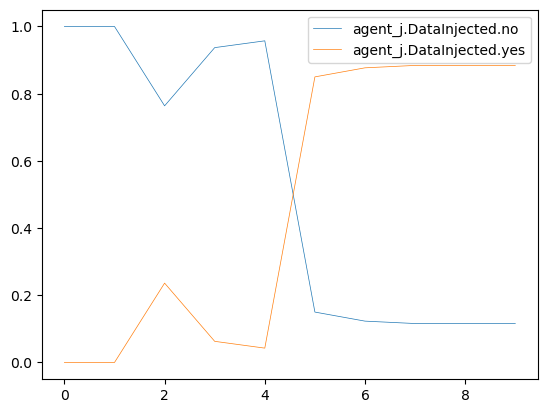

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0    EnumAccounts      DecoyAccount
1                 0.0                  1.0    EnumAccounts  RestrictAccPrivs
2                 0.0                  1.0      PrivEscAcc               Nop
3                 0.0                  1.0       FileRecon               Nop
4                 0.0                  1.0  ManipulateData               Nop
5                 1.0                  0.0            Exit               Nop
6                 1.0                  0.0             Nop               Nop
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

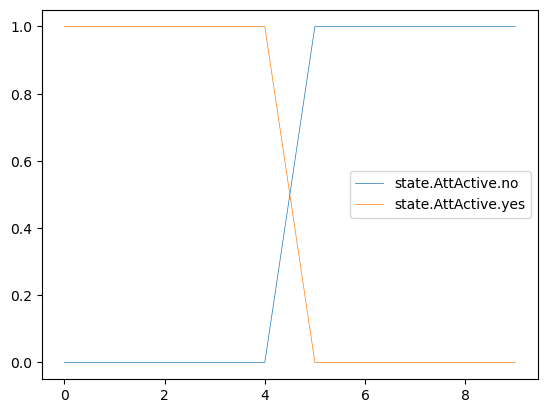

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

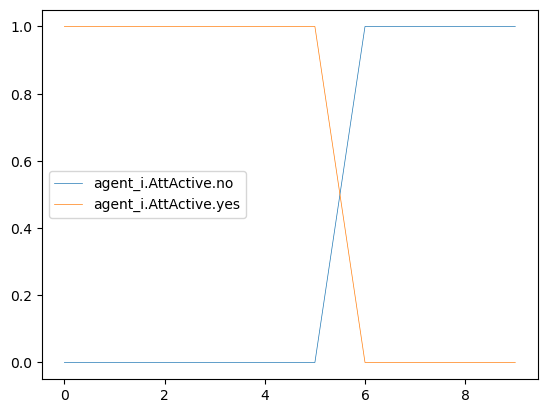

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.500000               0.500000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.093721               0.906279               Nop   
3              0.024975               0.975025               Nop   
4              0.315538               0.684462               Nop   
5              0.093980               0.906020               Nop   
6              0.936649               0.063351               Nop   
7              0.982202               0.017798               Nop   
8              0.983605               0.016395               Nop   
9              0.983606               0.016394               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

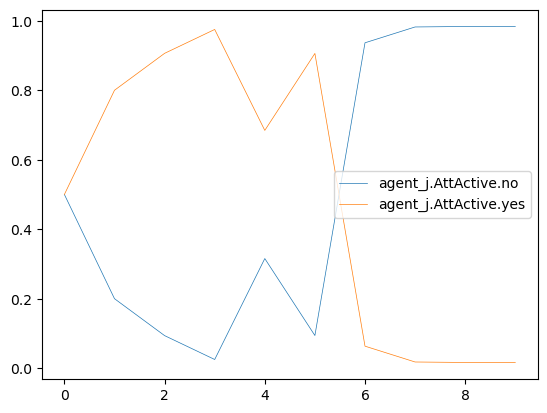

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

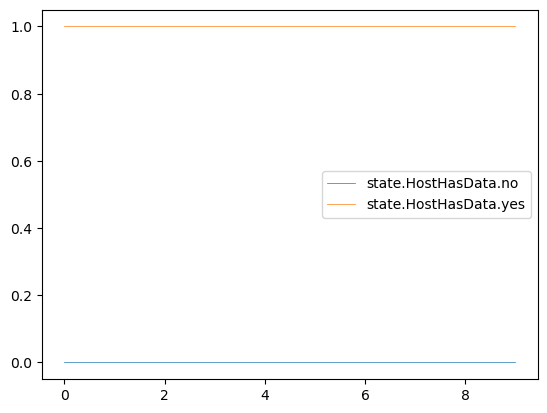

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.064103                 0.935897  ManipulateData   
5                0.000035                 0.999965            Exit   
6                0.000035                 0.999965             Nop   
7                0.000035                 0.999965             Nop   
8                0.000035                 0.999965             Nop   
9                0.000035                 0.999965             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

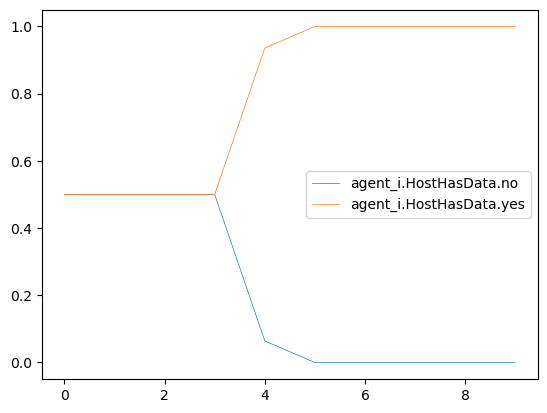

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

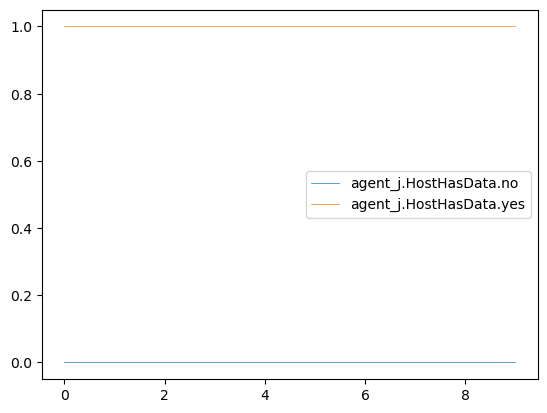

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0    EnumAccounts      DecoyAccount  
1                      1.0    EnumAccounts  RestrictAccPrivs  
2                      1.0      PrivEscAcc               Nop  
3                      1.0       FileRecon               Nop  
4                      1.0  ManipulateData               Nop  
5                      1.0            Exit               Nop  
6                      1.0             Nop               Nop  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

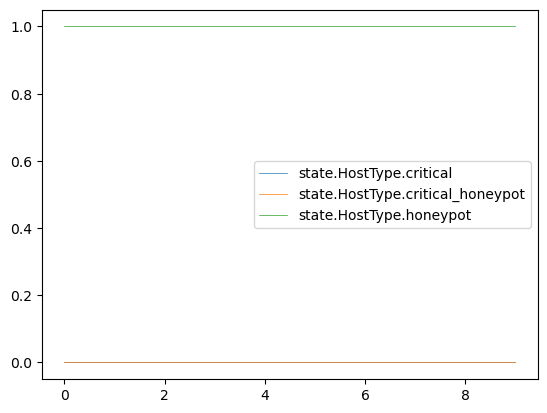

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0    EnumAccounts      DecoyAccount   
1                        0.0    EnumAccounts  RestrictAccPrivs   
2                        0.0      PrivEscAcc               Nop   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

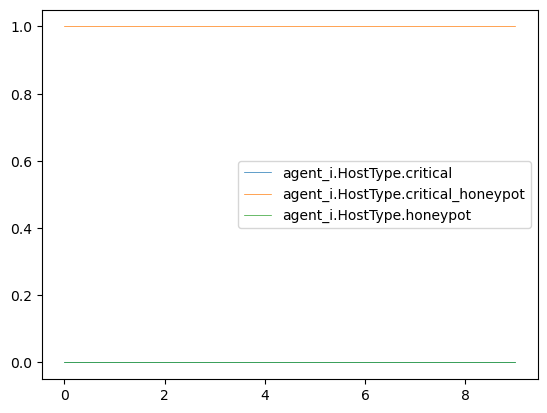

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  RestrictAccPrivs    EnumAccounts   
2                        1.0               Nop      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                             none  
4                       file_write  
5                   login_activity  
6                             none  
7                             none  
8                             none  
9                   login_activity

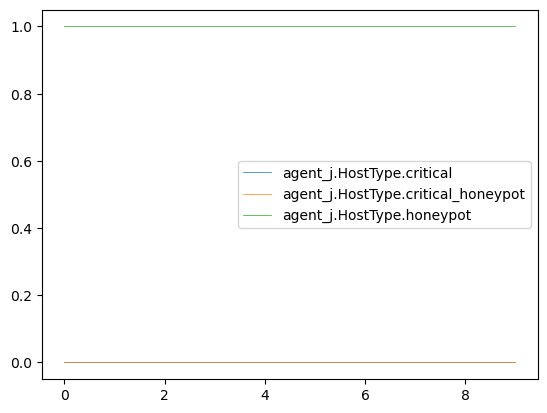

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0    EnumAccounts   
1                     0.0                     1.0    EnumAccounts   
2                     1.0                     0.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

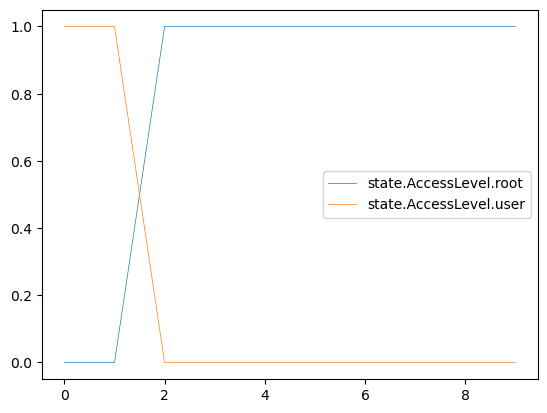

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

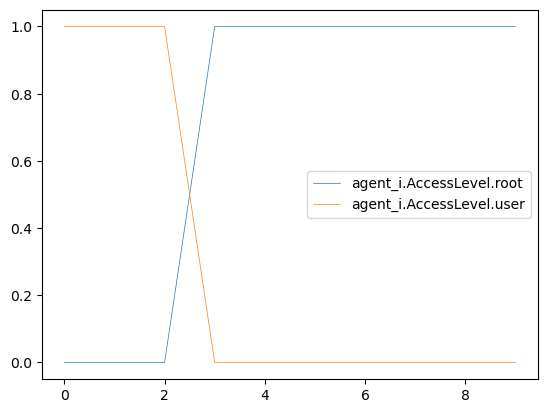

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.832645                  0.167355               Nop   
4                  0.596288                  0.403712               Nop   
5                  0.888452                  0.111548               Nop   
6                  0.888452                  0.111548               Nop   
7                  0.887513                  0.112487               Nop   
8                  0.887511                  0.112489               Nop   
9                  0.887511                  0.112489               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

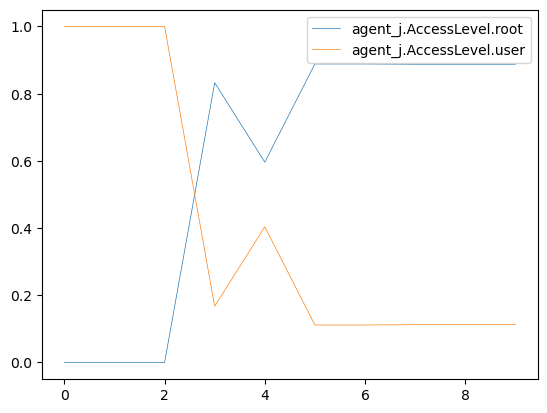

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0    EnumAccounts      DecoyAccount
1                 1.0                  0.0    EnumAccounts  RestrictAccPrivs
2                 1.0                  0.0      PrivEscAcc               Nop
3                 0.0                  1.0       FileRecon               Nop
4                 0.0                  1.0  ManipulateData               Nop
5                 0.0                  1.0            Exit               Nop
6                 0.0                  1.0             Nop               Nop
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

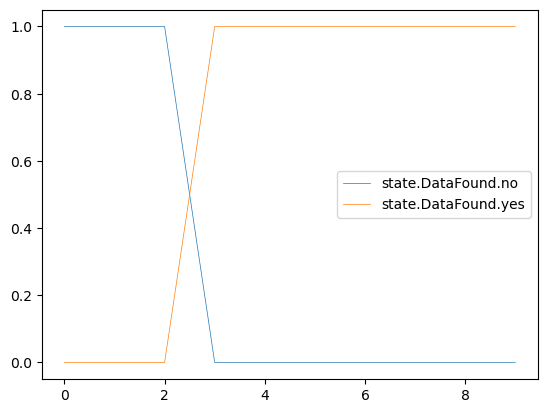

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.076923               0.923077  ManipulateData   
5              0.000042               0.999958            Exit   
6              0.000042               0.999958             Nop   
7              0.000042               0.999958             Nop   
8              0.000042               0.999958             Nop   
9              0.000042               0.999958             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

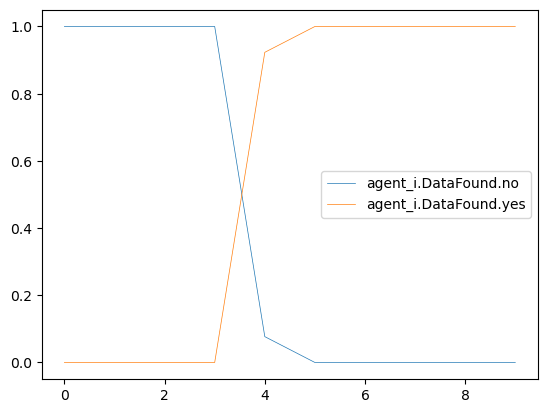

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.440000               0.560000  RestrictAccPrivs   
2              0.580131               0.419869               Nop   
3              0.670774               0.329226               Nop   
4              0.406598               0.593402               Nop   
5              0.102219               0.897781               Nop   
6              0.095396               0.904604               Nop   
7              0.096124               0.903876               Nop   
8              0.096125               0.903875               Nop   
9              0.096125               0.903875               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

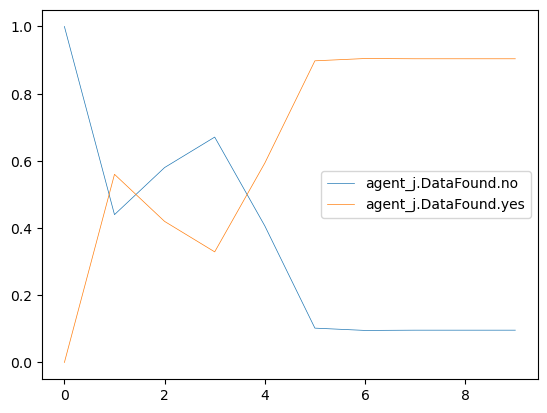

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0    EnumAccounts   
1                   1.0                   0.0    EnumAccounts   
2                   1.0                   0.0      PrivEscAcc   
3                   1.0                   0.0       FileRecon   
4                   1.0                   0.0  ManipulateData   
5                   1.0                   0.0            Exit   
6                   1.0                   0.0             Nop   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

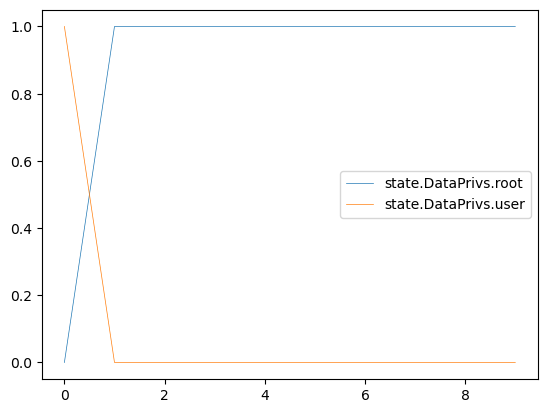

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.571429                0.428571    EnumAccounts   
2                0.996943                0.003057      PrivEscAcc   
3                0.996938                0.003062       FileRecon   
4                0.996938                0.003062  ManipulateData   
5                0.996938                0.003062            Exit   
6                0.996938                0.003062             Nop   
7                0.996938                0.003062             Nop   
8                0.996938                0.003062             Nop   
9                0.996938                0.003062             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

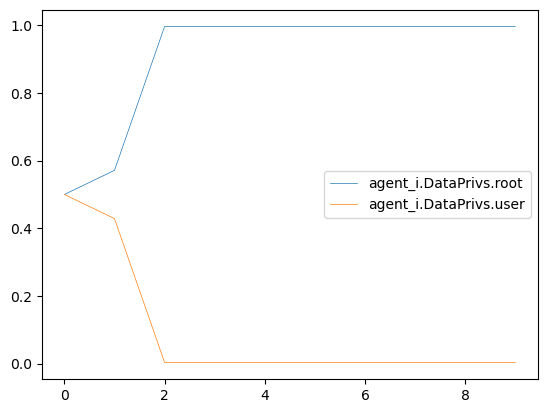

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

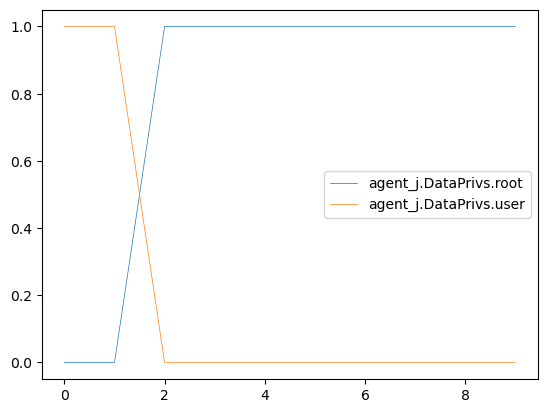

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   0.0                    1.0             Nop   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

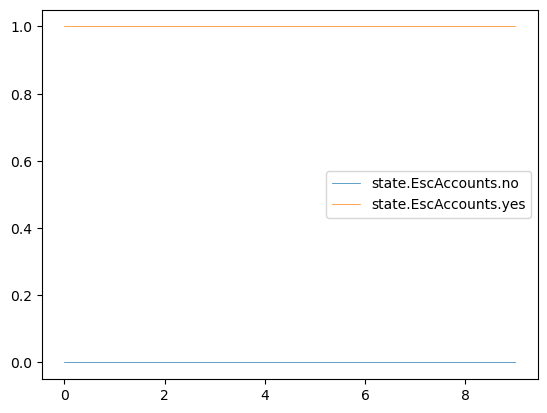

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.110837                 0.889163    EnumAccounts   
2                0.001053                 0.998947      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

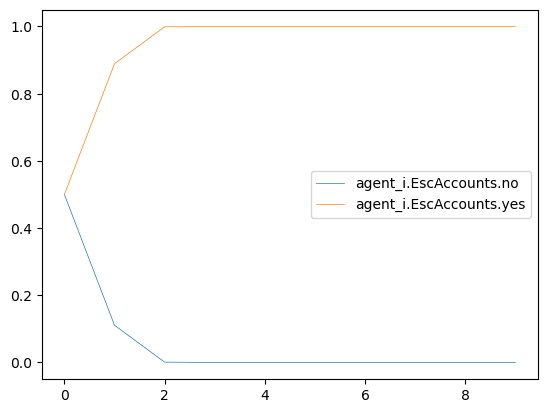

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                             none  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

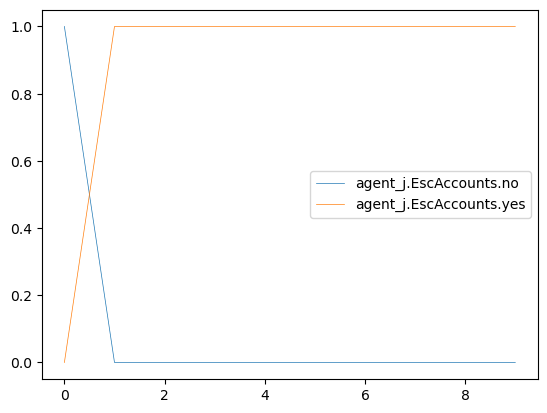

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.980194                        0.019806   
3                         0.996288                        0.003712   
4                         0.998684                        0.001316   
5                         0.998684                        0.001316   
6                         0.998684                        0.001316   
7                         0.998684                        0.001316   
8                         0.998684                        0.001316   
9                         0.998684                        0.001316   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                         none   
8                            auth                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           success                          active   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

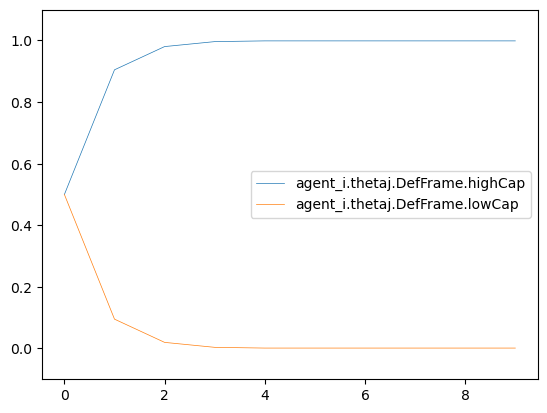

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

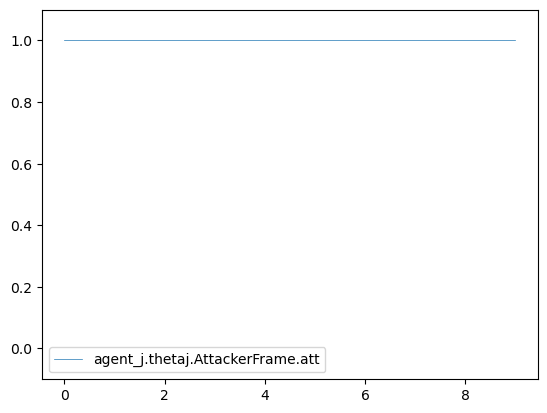

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0    EnumAccounts      DecoyAccount
1                1.0                 0.0    EnumAccounts  RestrictAccPrivs
2                0.0                 1.0    EnumAccounts               Nop
3                0.0                 1.0      PrivEscAcc               Nop
4                0.0                 1.0       FileRecon               Nop
5                0.0                 1.0  ManipulateData               Nop
6                0.0                 1.0            Exit               Nop
7                0.0                 1.0             Nop               Nop
8                0.0                 1.0             Nop               Nop
9                0.0                 1.0             Nop               Nop

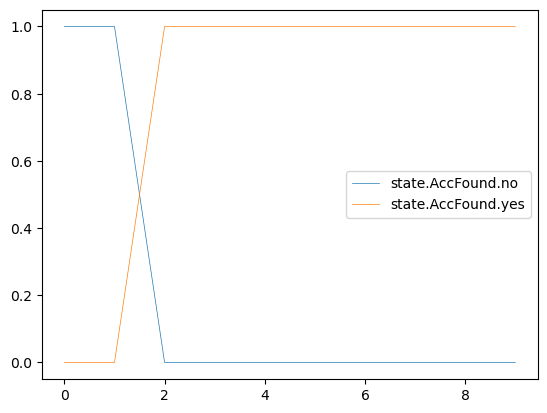

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.931034              0.068966    EnumAccounts   
2             0.682072              0.317929    EnumAccounts   
3             0.019673              0.980327      PrivEscAcc   
4             0.000000              1.000000       FileRecon   
5             0.000000              1.000000  ManipulateData   
6             0.000000              1.000000            Exit   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

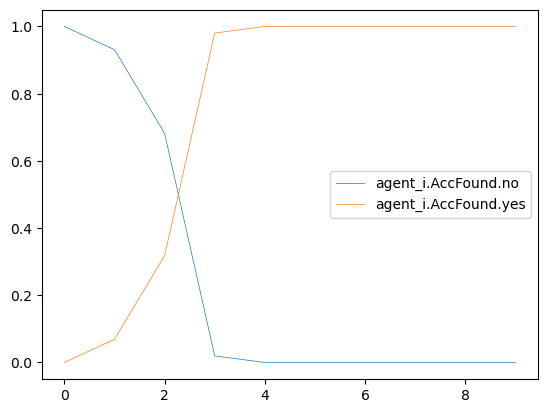

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.504030              0.495970               Nop   
3             0.372920              0.627080               Nop   
4             0.135580              0.864420               Nop   
5             0.420051              0.579949               Nop   
6             0.132351              0.867649               Nop   
7             0.133944              0.866056               Nop   
8             0.133718              0.866282               Nop   
9             0.133718              0.866282               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

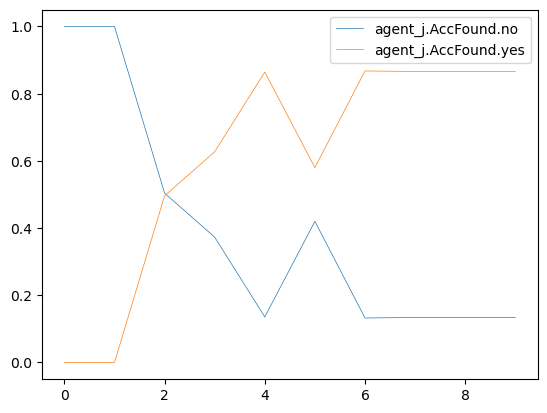

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0    EnumAccounts   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0    EnumAccounts   
3                    1.0                     0.0      PrivEscAcc   
4                    1.0                     0.0       FileRecon   
5                    0.0                     1.0  ManipulateData   
6                    0.0                     1.0            Exit   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

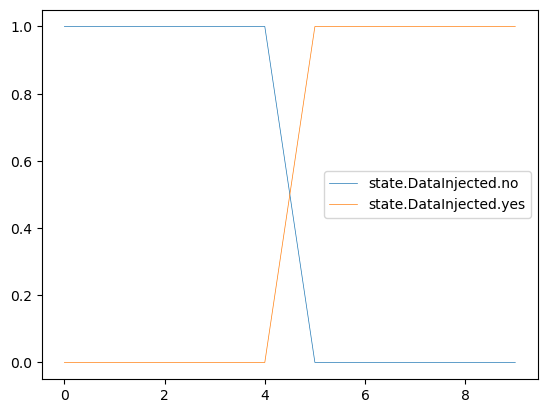

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000042                  0.999958            Exit   
7                 0.000042                  0.999958             Nop   
8                 0.000042                  0.999958             Nop   
9                 0.000042                  0.999958             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

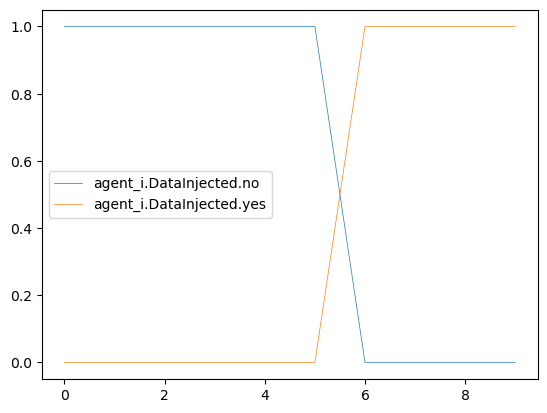

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.763824                  0.236176               Nop   
3                 0.514308                  0.485692               Nop   
4                 0.170802                  0.829198               Nop   
5                 0.436361                  0.563639               Nop   
6                 0.135250                  0.864750               Nop   
7                 0.136227                  0.863773               Nop   
8                 0.135981                  0.864019               Nop   
9                 0.135981                  0.864019               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

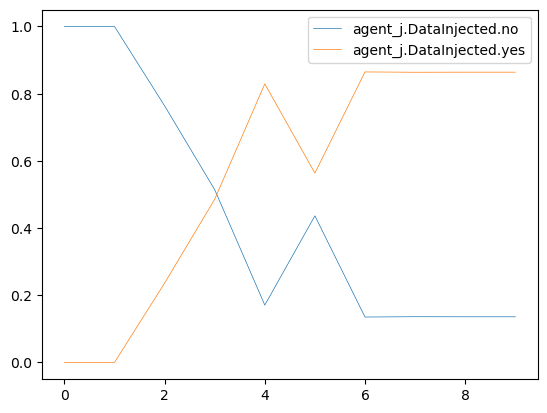

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0    EnumAccounts      DecoyAccount
1                 0.0                  1.0    EnumAccounts  RestrictAccPrivs
2                 0.0                  1.0    EnumAccounts               Nop
3                 0.0                  1.0      PrivEscAcc               Nop
4                 0.0                  1.0       FileRecon               Nop
5                 0.0                  1.0  ManipulateData               Nop
6                 1.0                  0.0            Exit               Nop
7                 1.0                  0.0             Nop               Nop
8                 1.0                  0.0             Nop               Nop
9                 1.0                  0.0             Nop               Nop

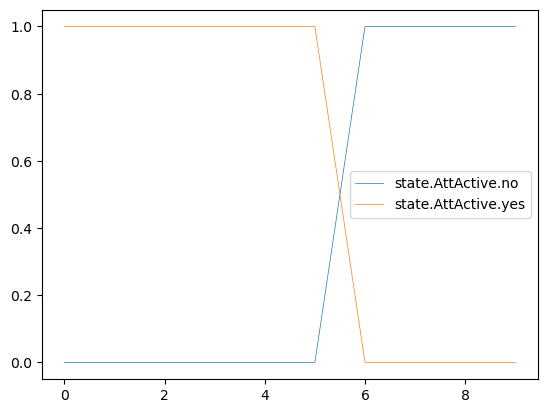

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

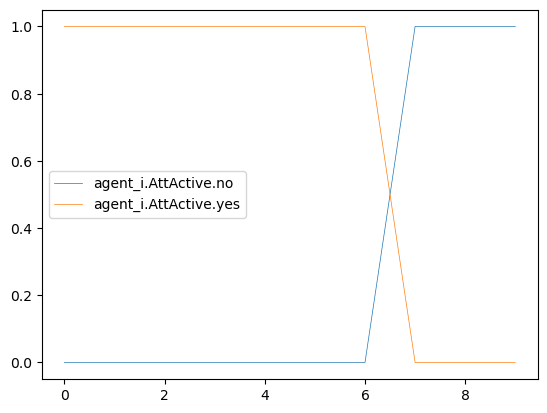

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.500000               0.500000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.093721               0.906279               Nop   
3              0.027534               0.972466               Nop   
4              0.109012               0.890988               Nop   
5              0.552707               0.447293               Nop   
6              0.182941               0.817059               Nop   
7              0.993047               0.006953               Nop   
8              0.993091               0.006909               Nop   
9              0.995062               0.004938               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

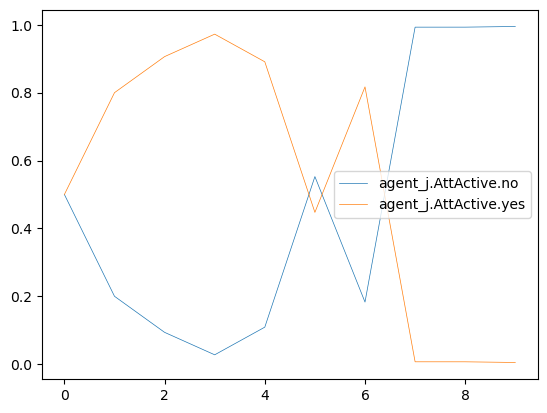

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

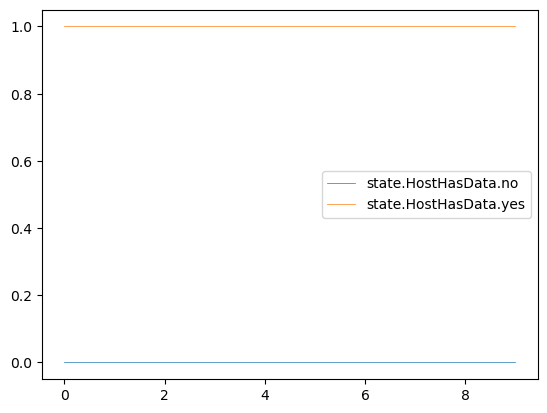

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000    EnumAccounts   
3                0.500000                 0.500000      PrivEscAcc   
4                0.500000                 0.500000       FileRecon   
5                0.064103                 0.935897  ManipulateData   
6                0.000035                 0.999965            Exit   
7                0.000035                 0.999965             Nop   
8                0.000035                 0.999965             Nop   
9                0.000035                 0.999965             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

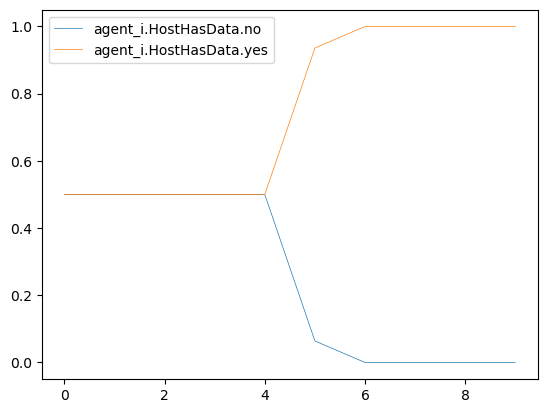

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

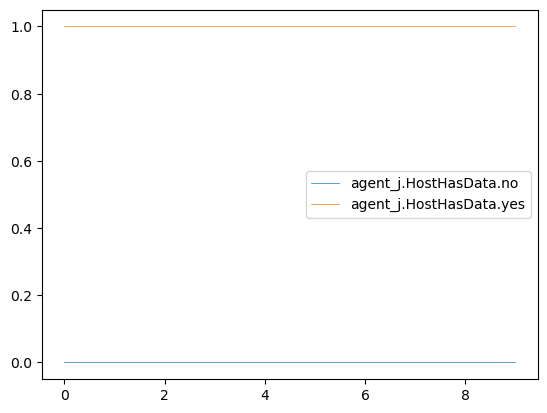

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0    EnumAccounts      DecoyAccount  
1                      1.0    EnumAccounts  RestrictAccPrivs  
2                      1.0    EnumAccounts               Nop  
3                      1.0      PrivEscAcc               Nop  
4                      1.0       FileRecon               Nop  
5                      1.0  ManipulateData               Nop  
6                      1.0            Exit               Nop  
7                      1.0             Nop               Nop  
8                      1.0             Nop               Nop  
9                      1.0             Nop               Nop

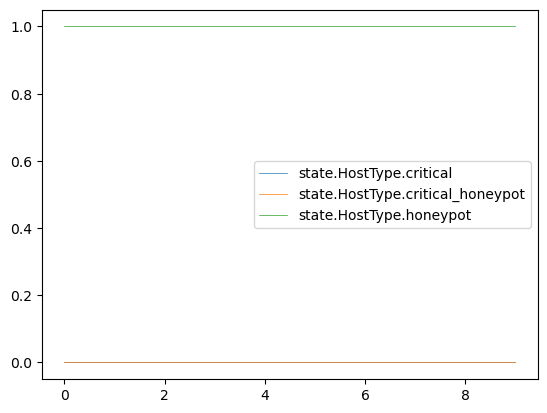

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0    EnumAccounts      DecoyAccount   
1                        0.0    EnumAccounts  RestrictAccPrivs   
2                        0.0    EnumAccounts               Nop   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                         none   
8                            auth                         none   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           success                          active   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

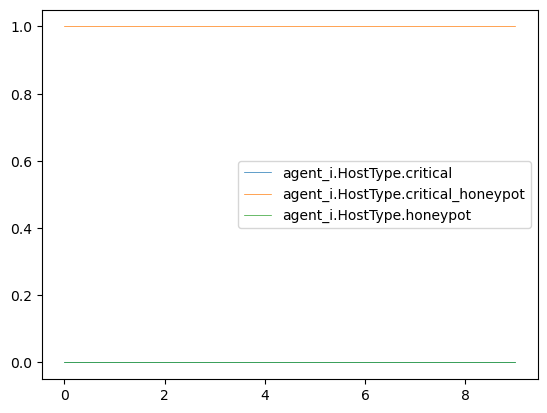

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  RestrictAccPrivs    EnumAccounts   
2                        1.0               Nop    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                       file_write  
6                             none  
7                       file_write  
8                             none  
9                             none

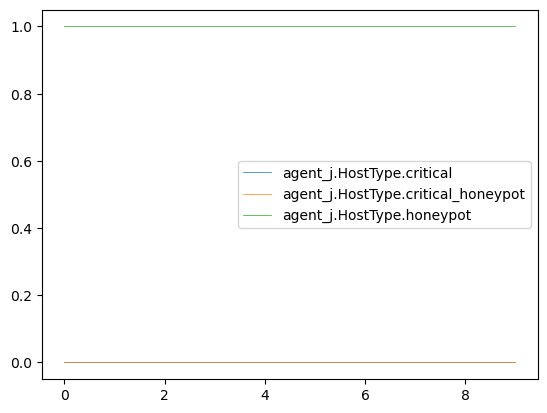

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0    EnumAccounts   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0    EnumAccounts   
3                     1.0                     0.0      PrivEscAcc   
4                     1.0                     0.0       FileRecon   
5                     1.0                     0.0  ManipulateData   
6                     1.0                     0.0            Exit   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

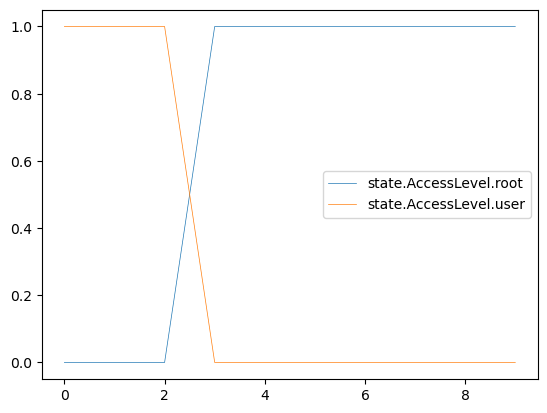

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0      PrivEscAcc   
4                       1.0                       0.0       FileRecon   
5                       1.0                       0.0  ManipulateData   
6                       1.0                       0.0            Exit   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

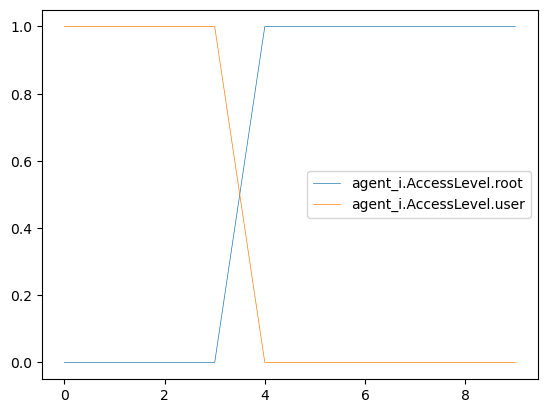

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.131137                  0.868863               Nop   
4                  0.820047                  0.179952               Nop   
5                  0.420646                  0.579353               Nop   
6                  0.817461                  0.182539               Nop   
7                  0.815264                  0.184736               Nop   
8                  0.815576                  0.184424               Nop   
9                  0.815576                  0.184424               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

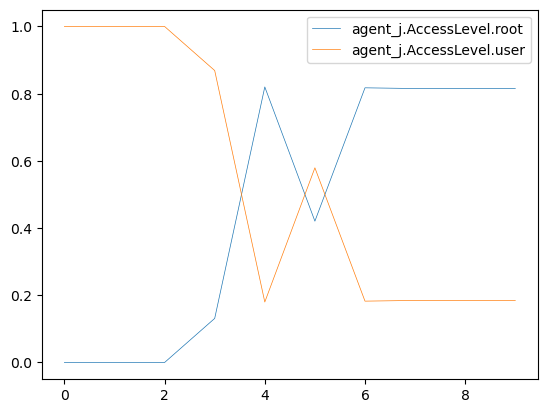

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0    EnumAccounts      DecoyAccount
1                 1.0                  0.0    EnumAccounts  RestrictAccPrivs
2                 1.0                  0.0    EnumAccounts               Nop
3                 1.0                  0.0      PrivEscAcc               Nop
4                 0.0                  1.0       FileRecon               Nop
5                 0.0                  1.0  ManipulateData               Nop
6                 0.0                  1.0            Exit               Nop
7                 0.0                  1.0             Nop               Nop
8                 0.0                  1.0             Nop               Nop
9                 0.0                  1.0             Nop               Nop

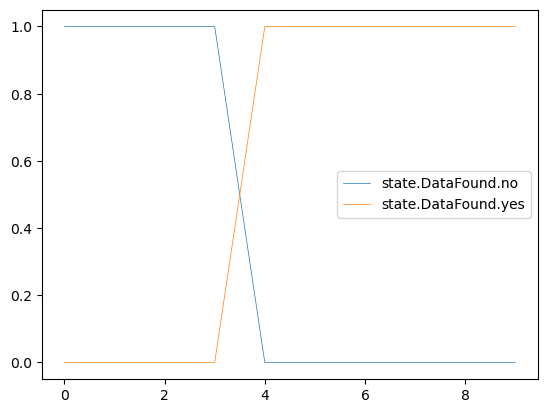

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000    EnumAccounts   
3              1.000000               0.000000      PrivEscAcc   
4              1.000000               0.000000       FileRecon   
5              0.076923               0.923077  ManipulateData   
6              0.000042               0.999958            Exit   
7              0.000042               0.999958             Nop   
8              0.000042               0.999958             Nop   
9              0.000042               0.999958             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

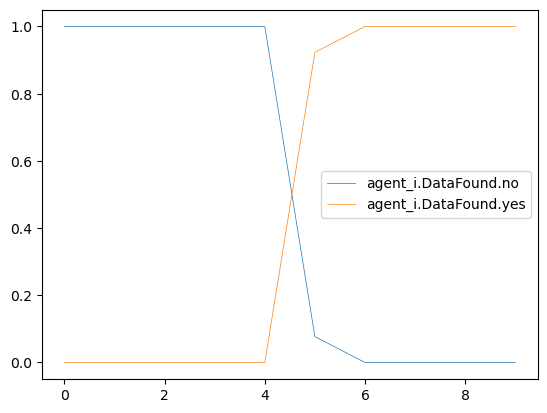

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.440000               0.560000  RestrictAccPrivs   
2              0.580131               0.419869               Nop   
3              0.376155               0.623845               Nop   
4              0.104276               0.895724               Nop   
5              0.316018               0.683982               Nop   
6              0.099402               0.900598               Nop   
7              0.100463               0.899537               Nop   
8              0.100294               0.899706               Nop   
9              0.100294               0.899705               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

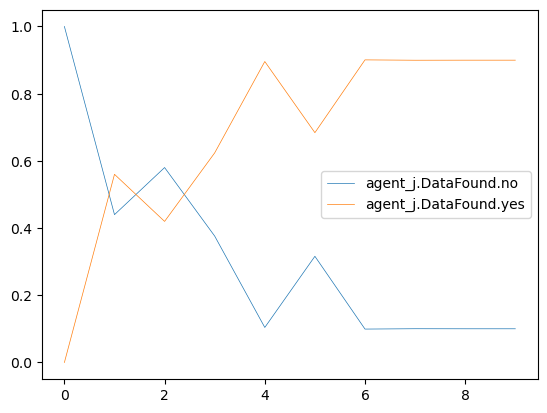

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0    EnumAccounts   
1                   1.0                   0.0    EnumAccounts   
2                   1.0                   0.0    EnumAccounts   
3                   1.0                   0.0      PrivEscAcc   
4                   1.0                   0.0       FileRecon   
5                   1.0                   0.0  ManipulateData   
6                   1.0                   0.0            Exit   
7                   1.0                   0.0             Nop   
8                   1.0                   0.0             Nop   
9                   1.0                   0.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

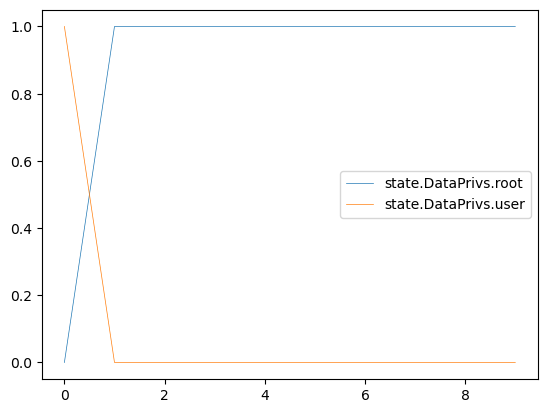

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.571429                0.428571    EnumAccounts   
2                0.997024                0.002976    EnumAccounts   
3                0.996945                0.003055      PrivEscAcc   
4                0.996937                0.003063       FileRecon   
5                0.996937                0.003063  ManipulateData   
6                0.996937                0.003063            Exit   
7                0.996937                0.003063             Nop   
8                0.996937                0.003063             Nop   
9                0.996937                0.003063             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

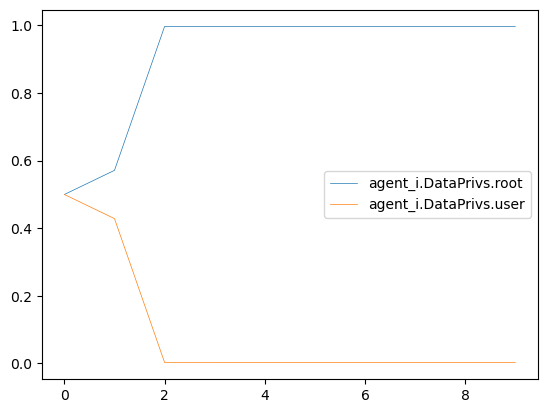

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

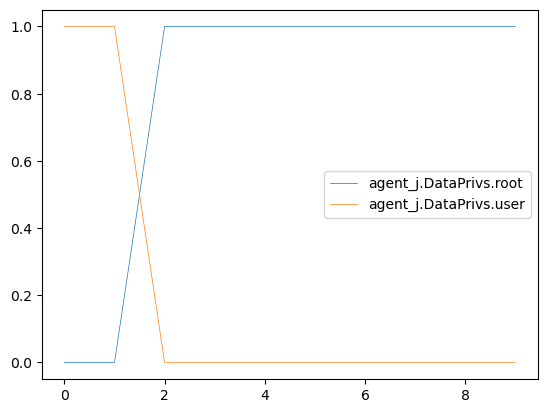

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   0.0                    1.0             Nop   
8                   0.0                    1.0             Nop   
9                   0.0                    1.0             Nop   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

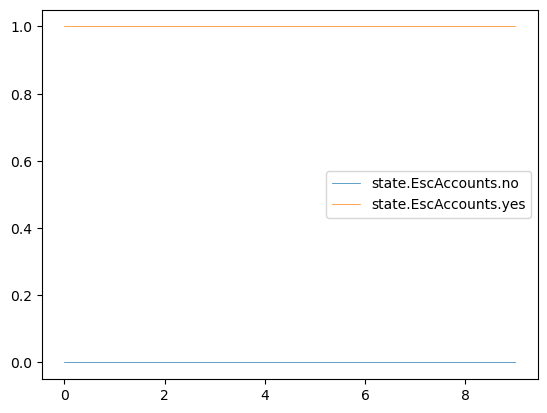

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.110837                 0.889163    EnumAccounts   
2                0.027826                 0.972174    EnumAccounts   
3                0.002731                 0.997269      PrivEscAcc   
4                0.000000                 1.000000       FileRecon   
5                0.000000                 1.000000  ManipulateData   
6                0.000000                 1.000000            Exit   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                         none                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

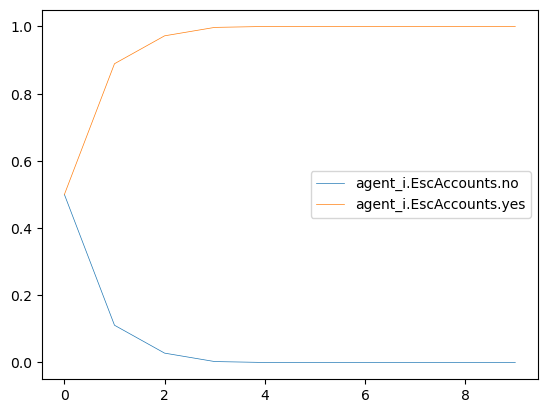

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

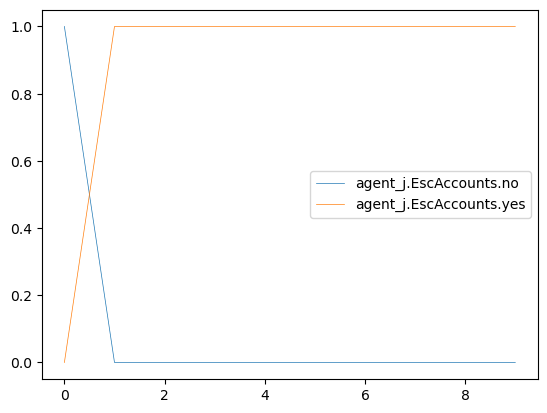

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    